### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# To avoid Warning message inbetween ...
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [2]:
df = pd.read_csv("Attrition1.csv")

### Quick Analysis on Dataset

In [3]:
#Quick Analysis on Dataset : DataTypes, Rows and Columns ,Null values, Unique values ...
def quick_analysis(df):
    print("Data Types:")
    print(df.dtypes)
    print("\nRows and Columns:")
    print(df.shape)
    print("\nColumn names:")
    print(df.columns)
    print("\nNull Values")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
    print("\nUnique values")
    print(df.nunique())

quick_analysis(df)

Data Types:
Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWor

### Removing Unwanted Variables

In [4]:
#Dropping the unwanted columns: Those having only one unique value.
df=df.drop(["EmployeeCount","Over18","StandardHours","EmployeeNumber"],axis=1)

### Exploratory Data Analysis (EDA)

In [5]:
#Visual Exploratory Data Analysis (EDA) And Your First Model
#EDA on Feature Variables
print(list(set(df.dtypes.tolist())))
df_object = df.select_dtypes(include=["object"]).copy()
df_int = df.select_dtypes(include=['int64']).copy()

categorical = df_object.columns
numerical = df_int.columns

print("Datashape of Object Dataframe:",df_object.shape)
print("Datashape of Interger Dataframe:",df_int.shape)

[dtype('O'), dtype('int64')]
Datashape of Object Dataframe: (1470, 7)
Datashape of Interger Dataframe: (1470, 24)


### Univariate Analysis

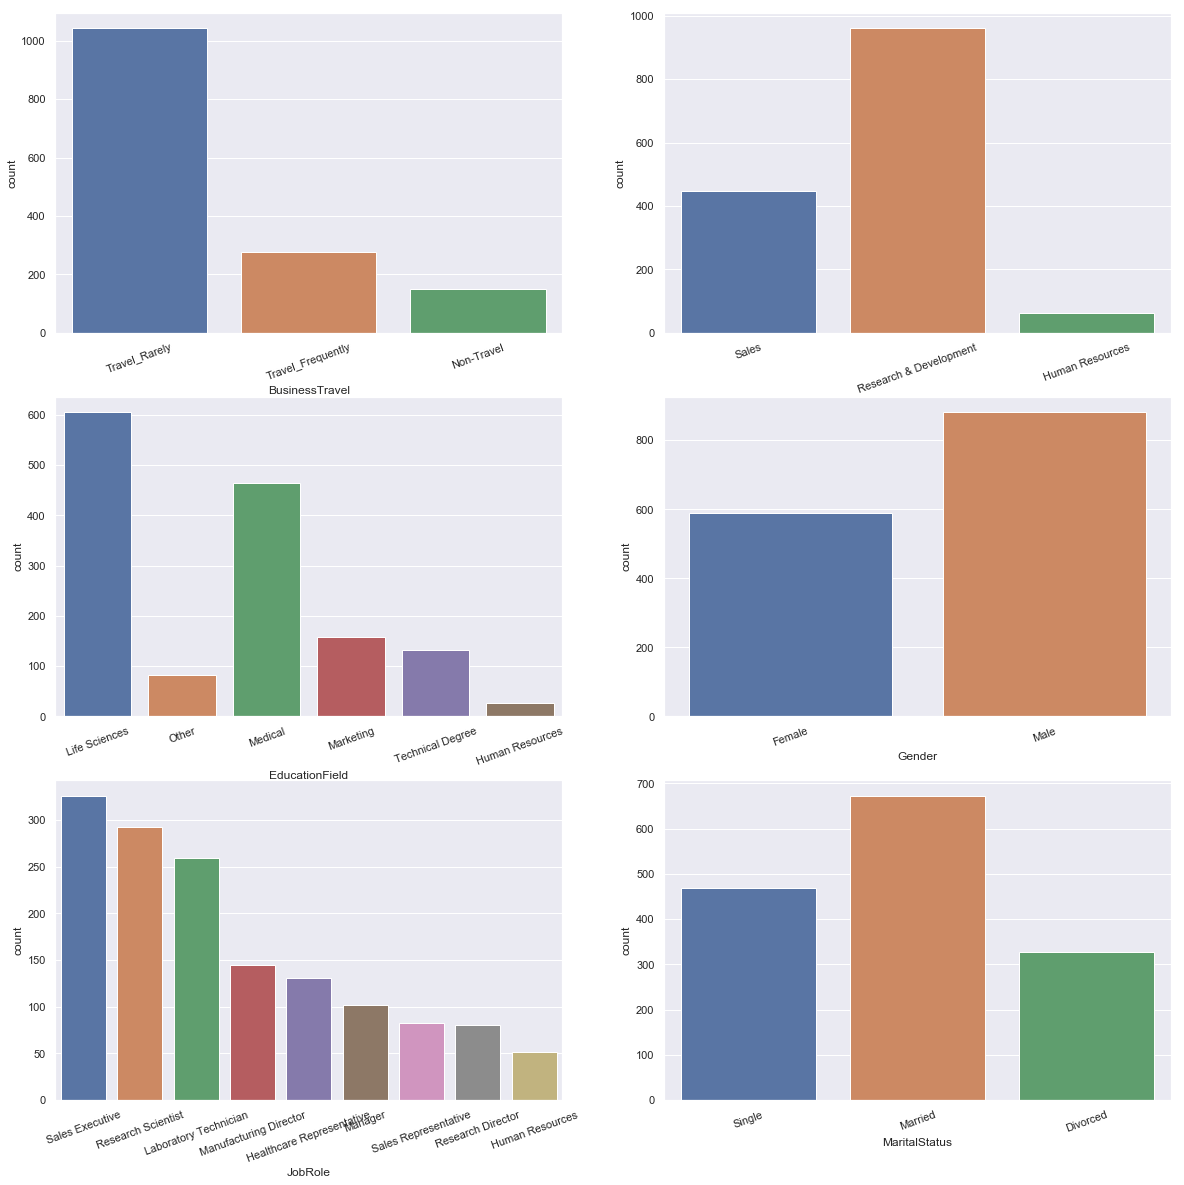

In [6]:
# Univariate Analysis
# EDA with Categorical Variables

fig,ax = plt.subplots(3,2, figsize=(20,20))
for variable,subplot in zip(categorical,ax.flatten()):
    sns.countplot(df[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(20)

### Univariate Analysis on: Numerical Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C2A18176D8>,
      dtype=object)

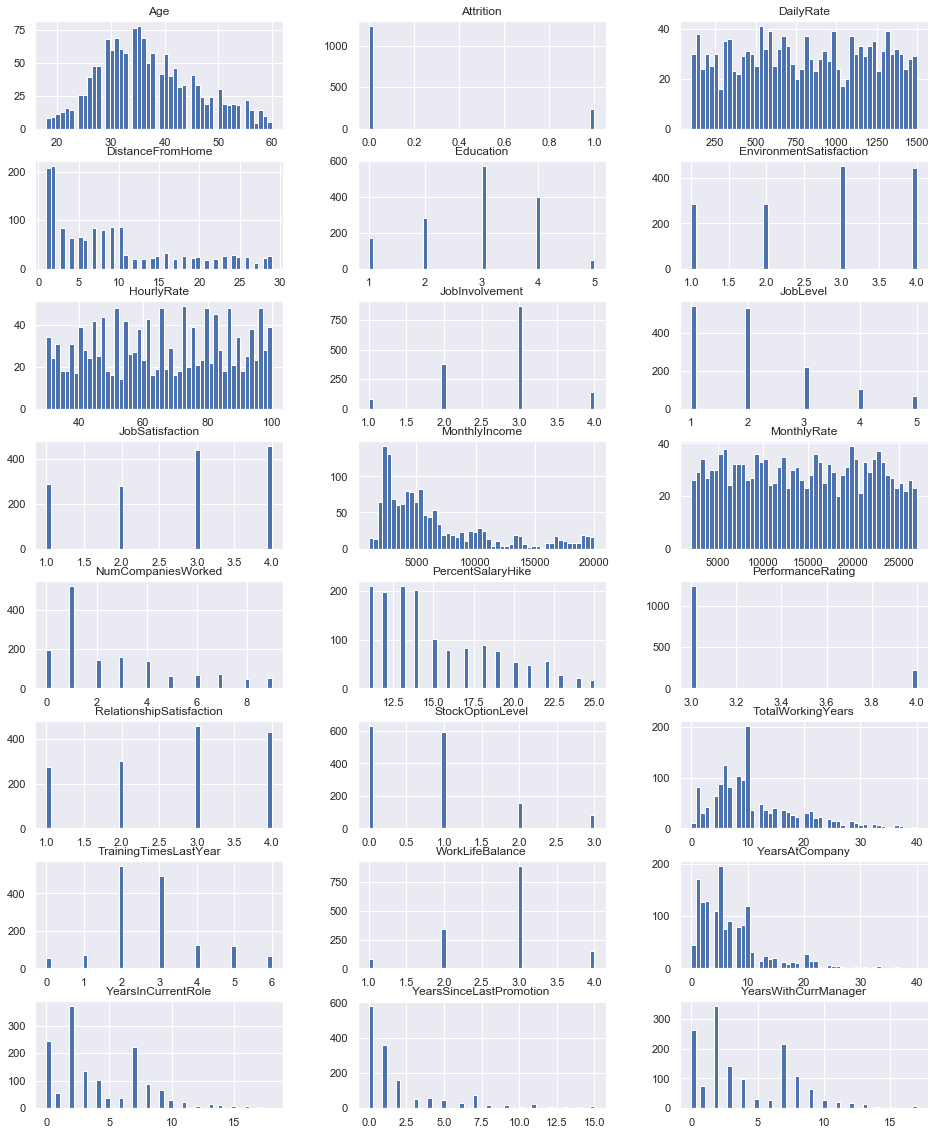

In [7]:
# EDA with Numerical Variables
df[numerical].hist(bins=50,figsize=(16,20),layout=(8,3))

### Bivariate analysis

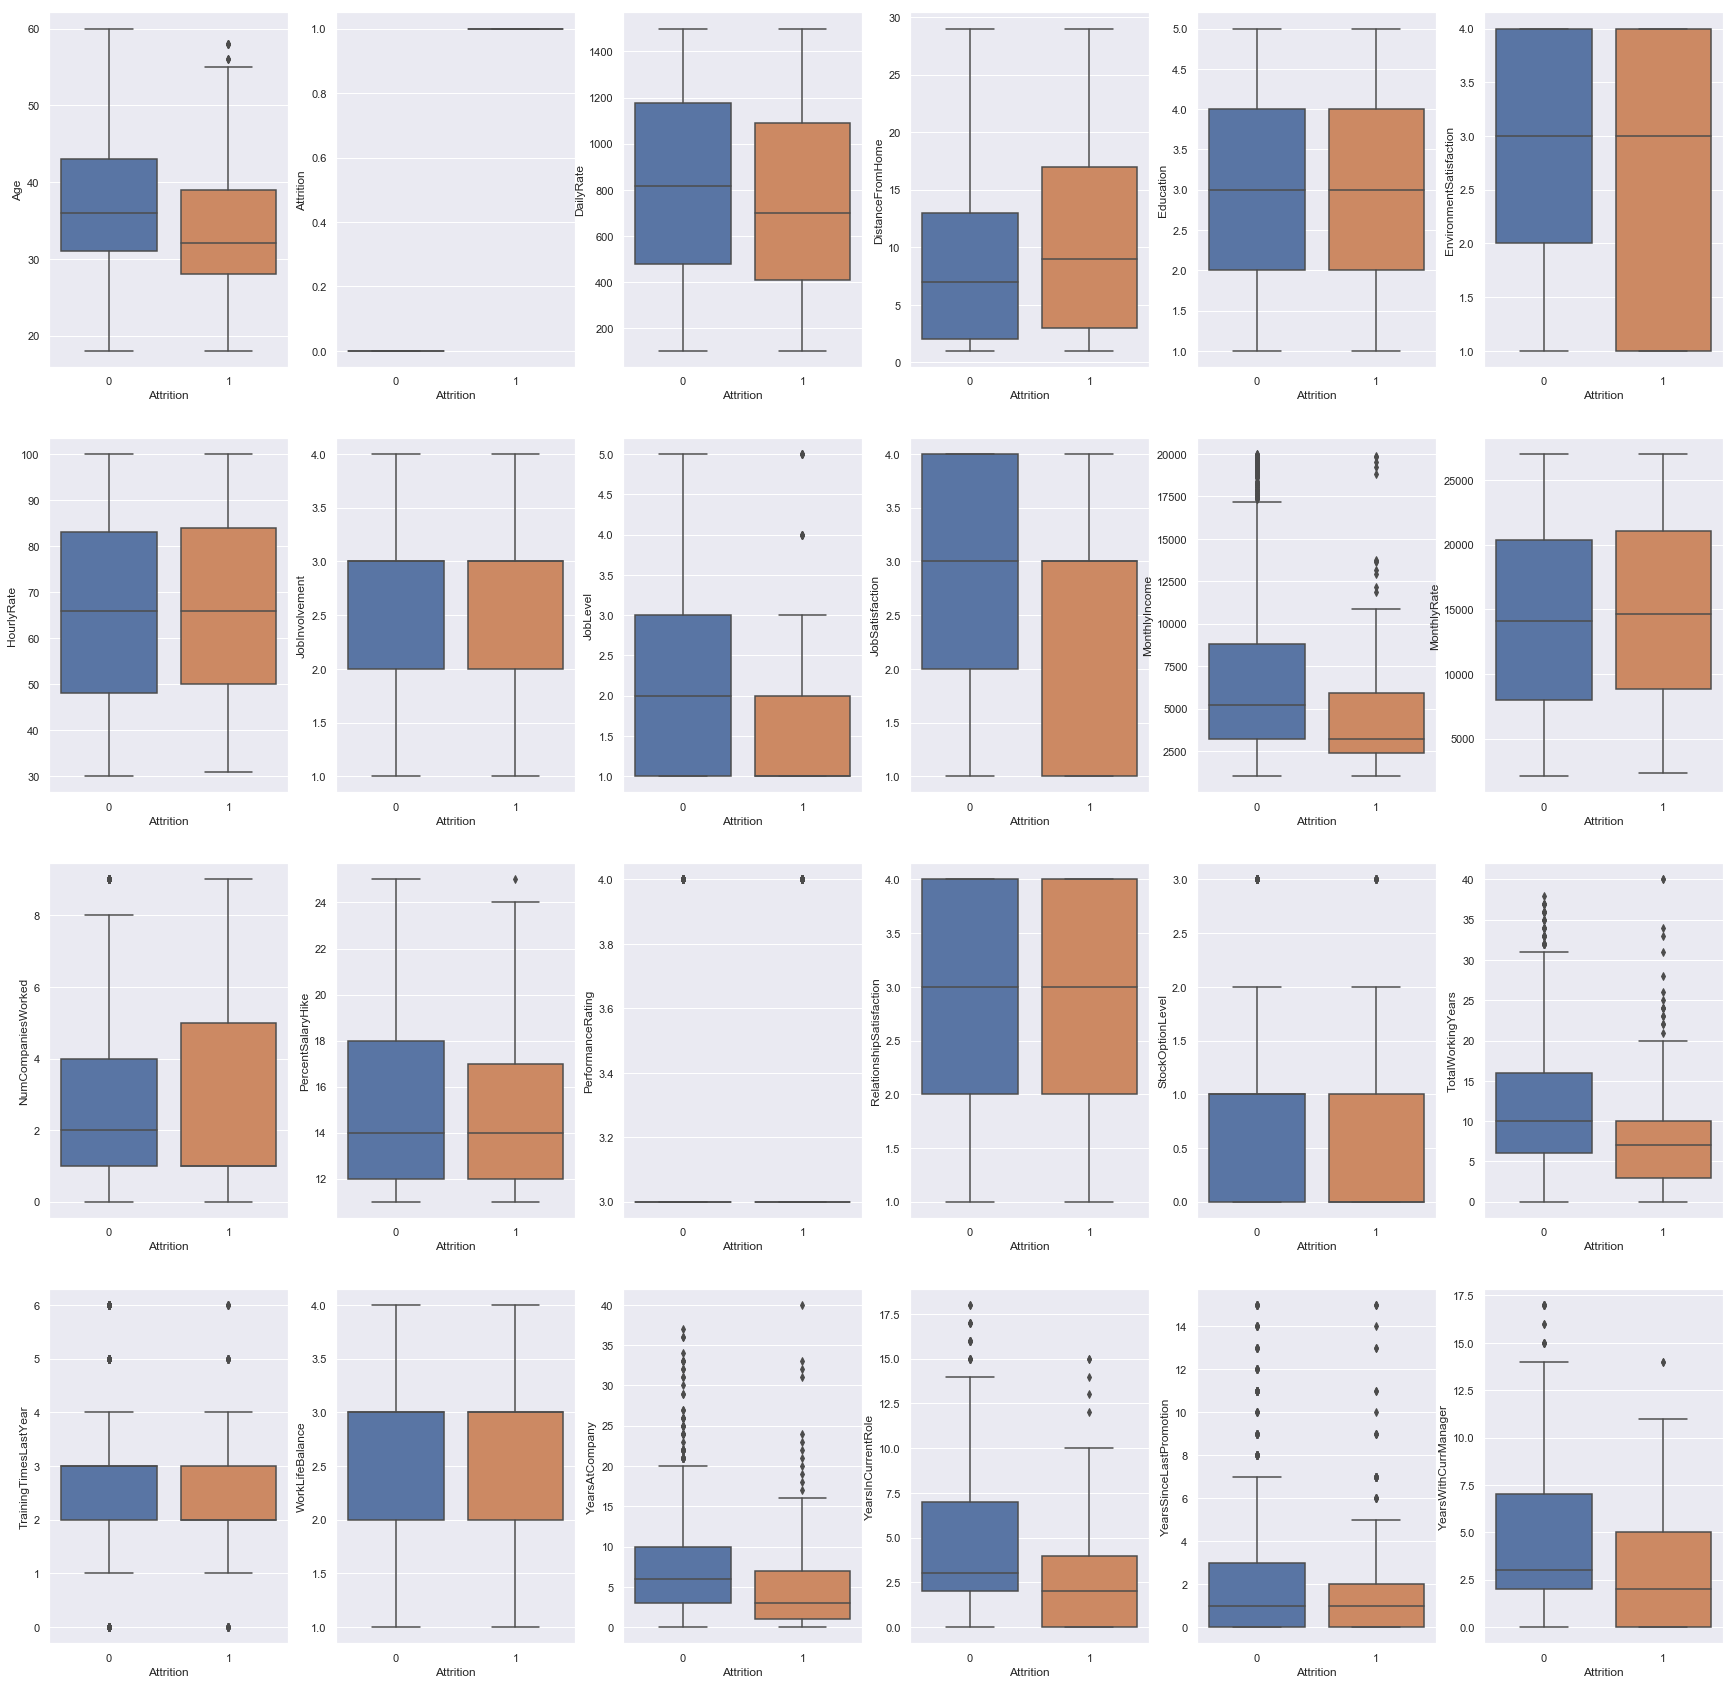

In [8]:
# Bivariate analysis - Categorical (Target variable) vs Numerical ( Feature Variables)
fig , ax =plt.subplots(4,6,figsize=(30,30))
for var,subplot in zip(numerical,ax.flatten()):
    sns.boxplot(x="Attrition",y=var,data=df, ax=subplot)

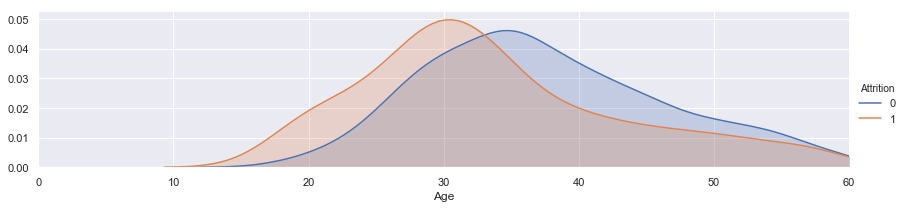

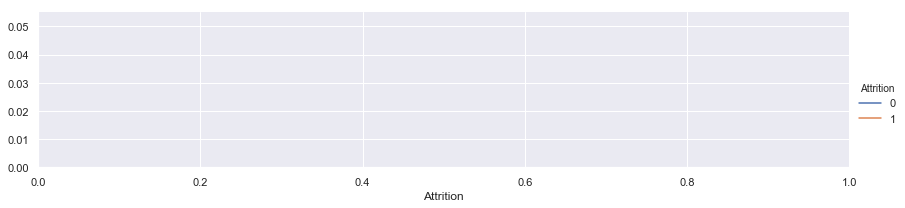

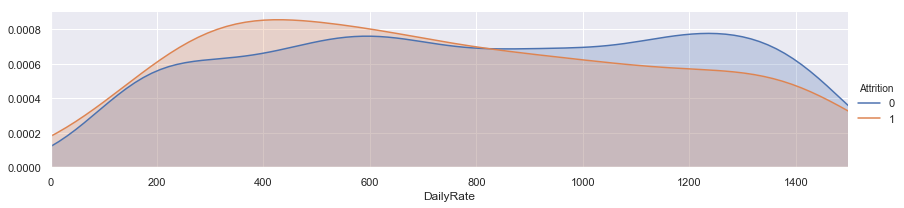

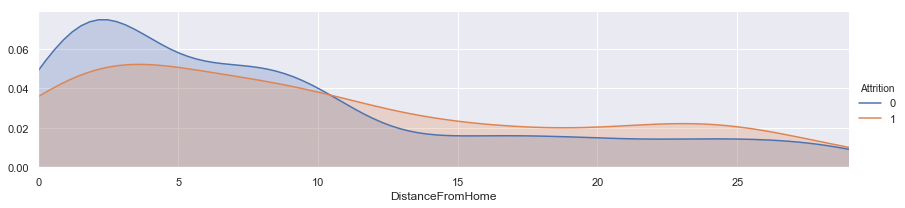

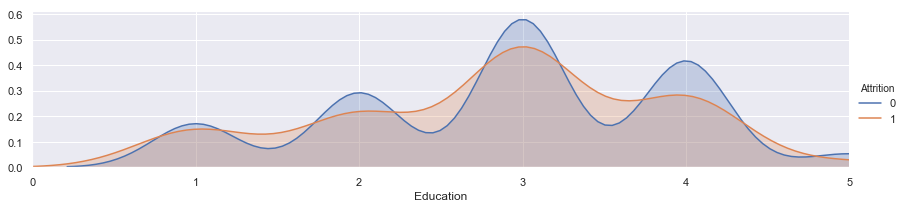

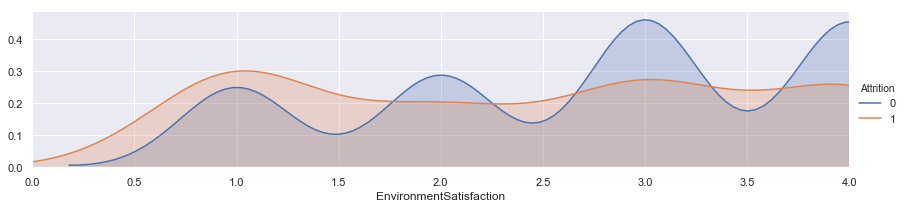

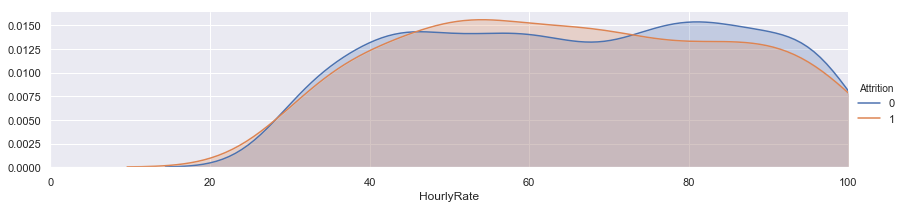

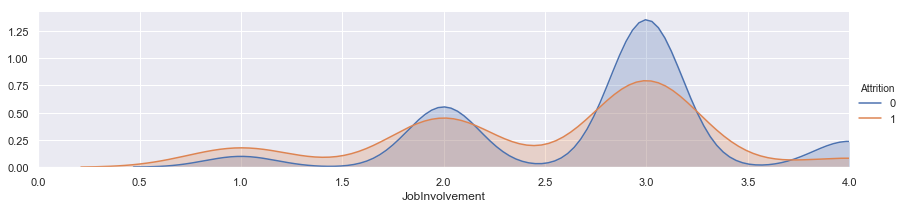

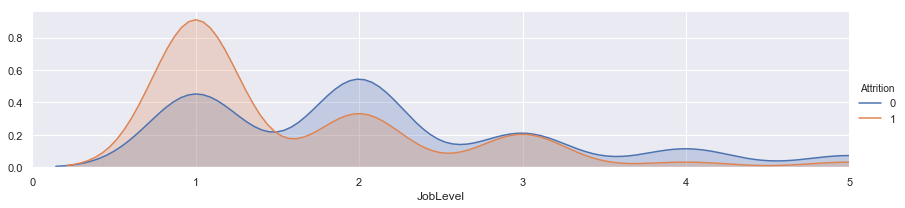

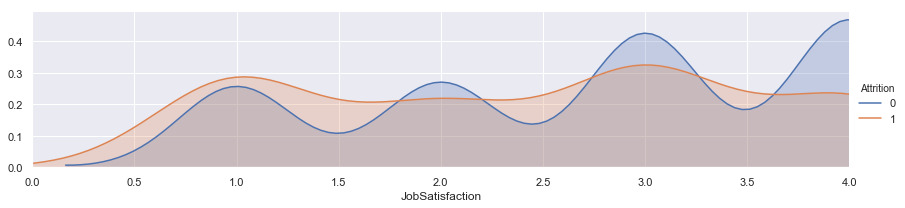

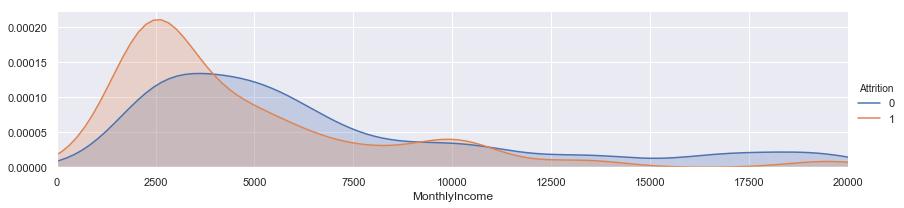

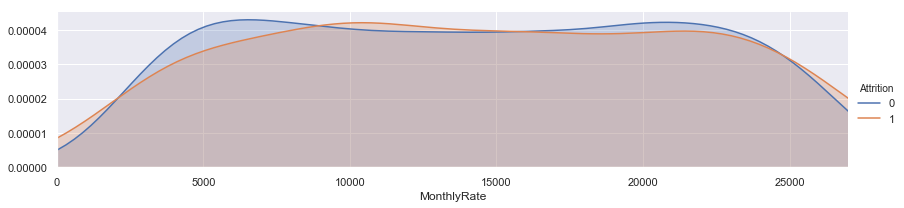

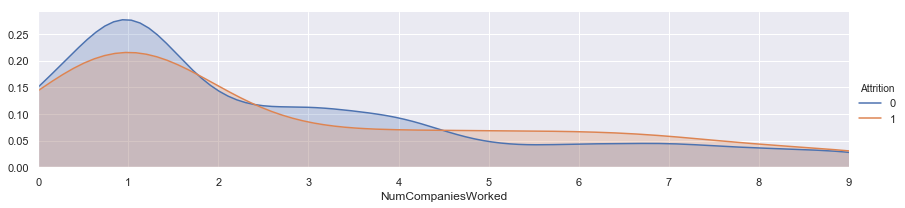

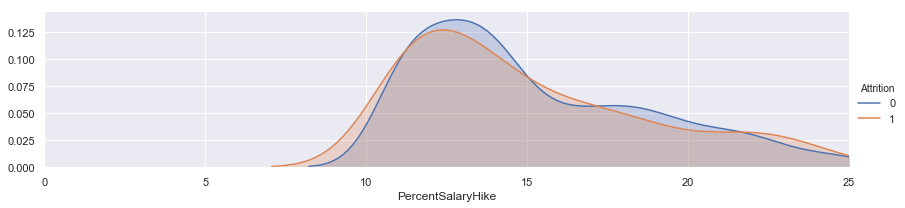

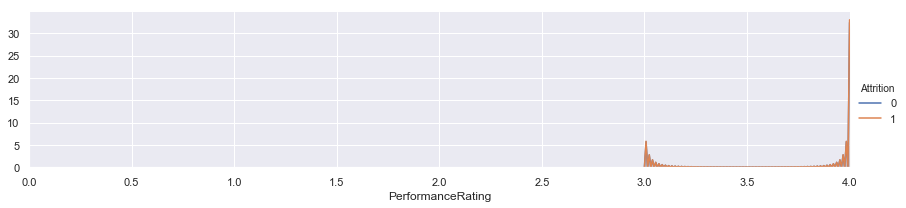

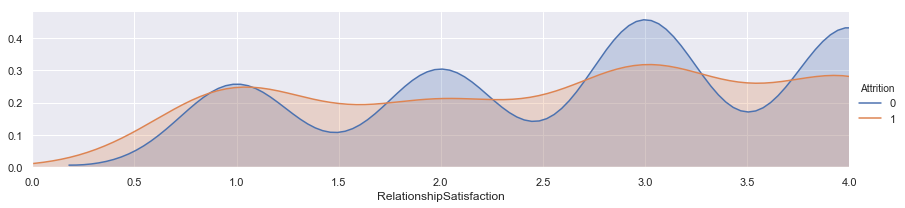

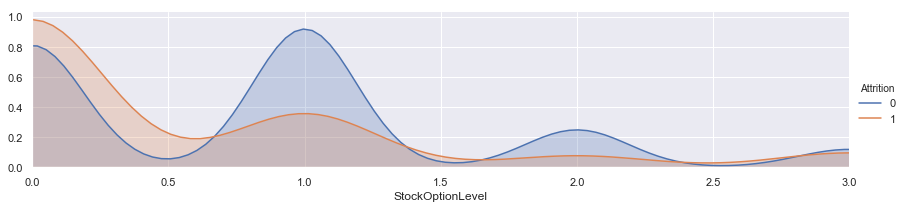

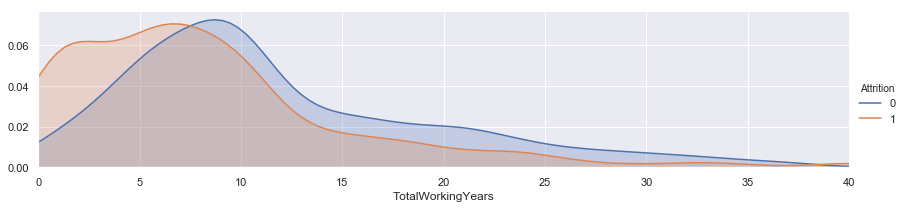

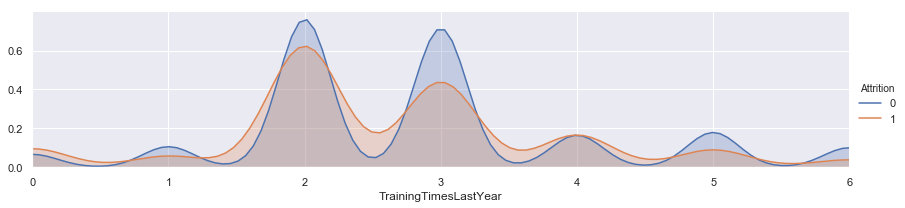

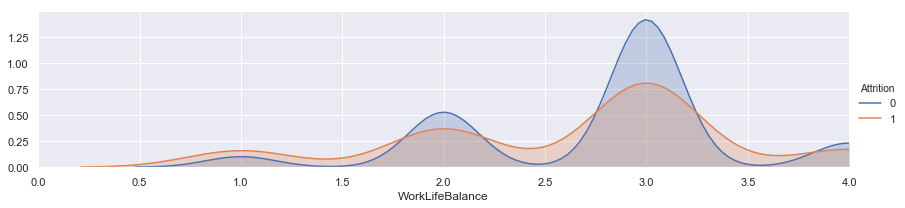

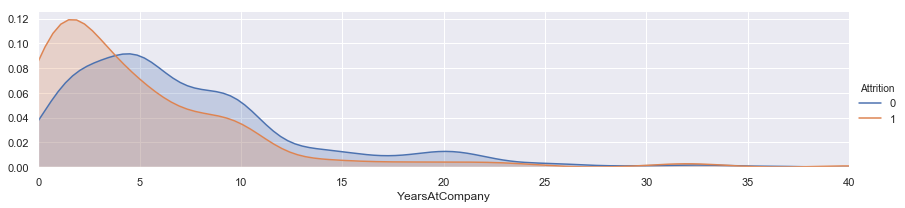

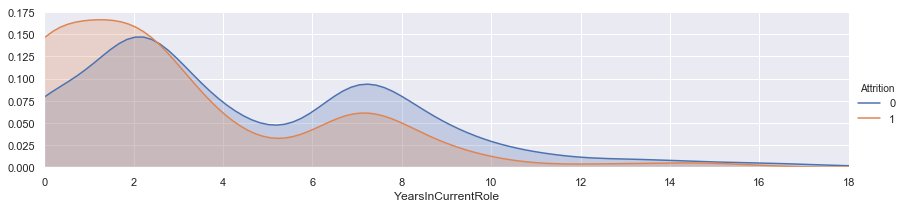

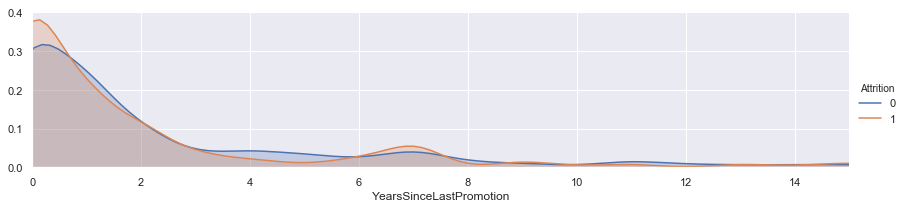

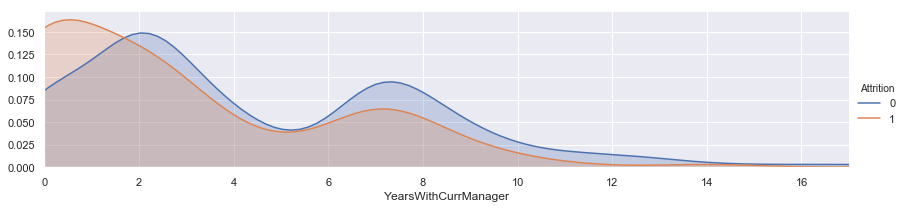

In [9]:
#fig , ax =plt.subplots(3,8,figsize=(30,30))
for var,subplot in zip(numerical,ax.flatten()):
    facet = sns.FacetGrid(df,hue="Attrition",aspect=4)
    facet.map(sns.kdeplot,var,shade= True)
    facet.set(xlim=(0,df[var].max()))
    facet.add_legend()
    plt.show()
    #sns.boxplot(x="Attrition",y=var,data=df, ax=subplot) 

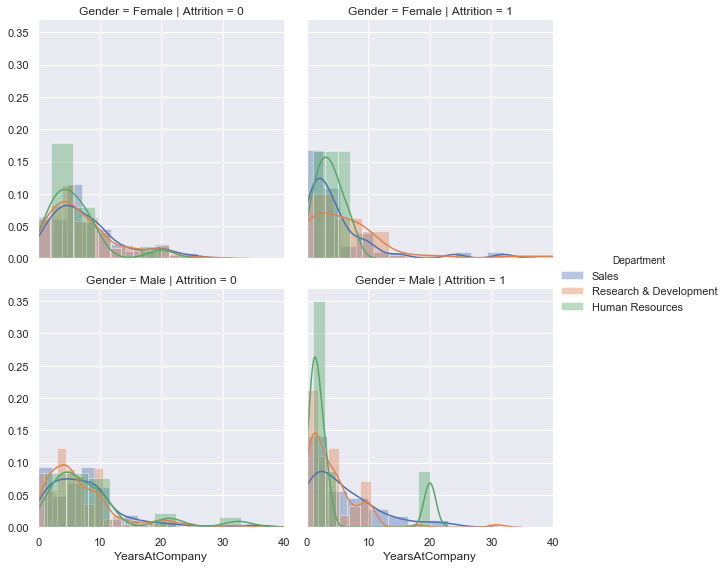

In [10]:
g = sns.FacetGrid(df, col="Attrition",row="Gender",aspect=1,height=4,hue="Department") 
g.map(sns.distplot, "YearsAtCompany")
g.set(xlim=(0,df["YearsAtCompany"].max()))
#plt.xlim(0,6)
g.add_legend()

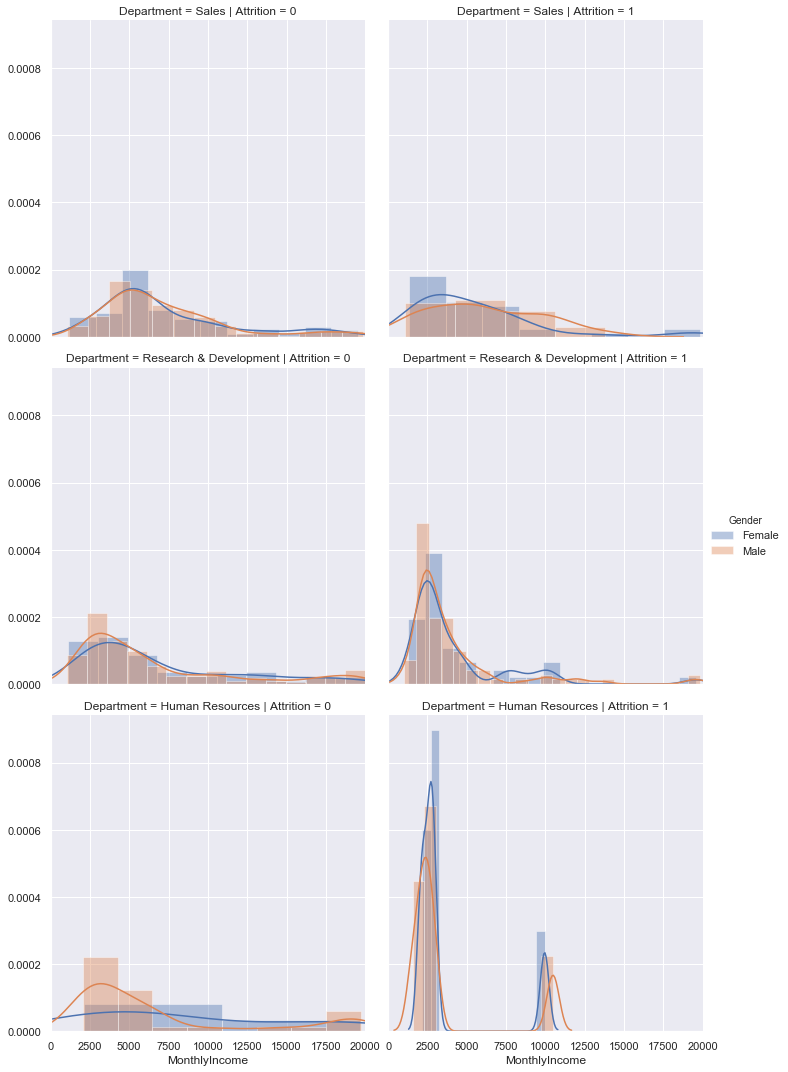

In [11]:
g = sns.FacetGrid(df, col="Attrition",row="Department",hue="Gender",aspect=1,height=5) 
g.map(sns.distplot, "MonthlyIncome")
g.add_legend()
g.set(xlim=(0,df["MonthlyIncome"].max()))

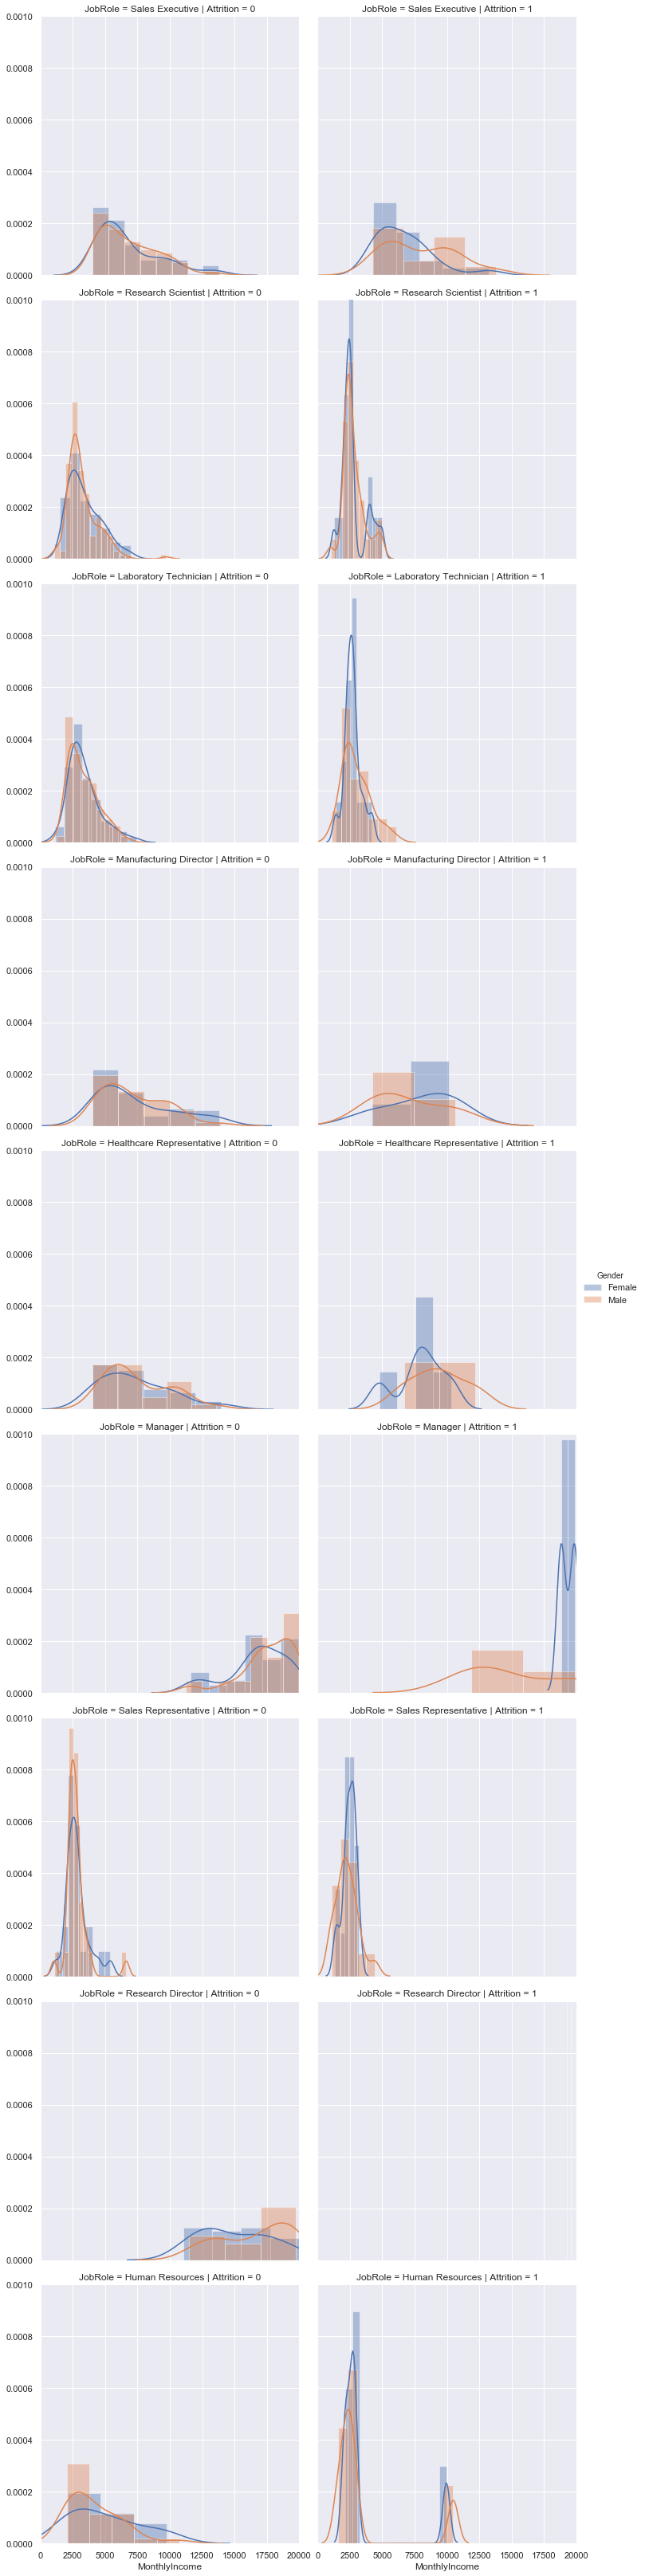

In [12]:
g = sns.FacetGrid(df, col="Attrition",row="JobRole",hue="Gender",aspect=1,height=5) 
g.map(sns.distplot, "MonthlyIncome")
g.add_legend()
plt.ylim(0,0.0010)
g.set(xlim=(0,df["MonthlyIncome"].max()))

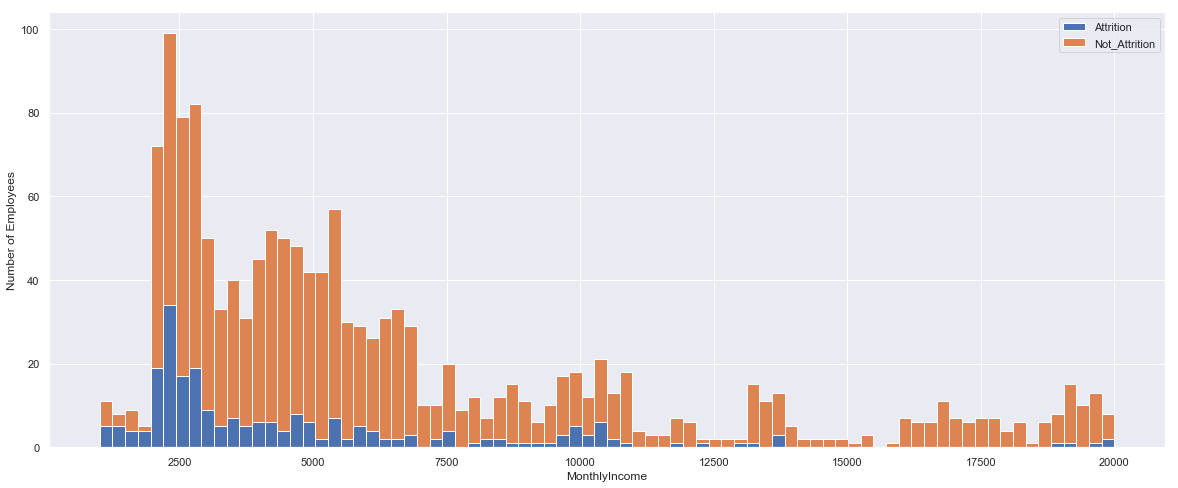

In [13]:
figure = plt.figure(figsize=(20,8))
plt.hist([df[df['Attrition'] == 1]['MonthlyIncome'], df[df['Attrition'] == 0]['MonthlyIncome']], 
         stacked=True,
         bins = 80, label = ['Attrition','Not_Attrition'])
plt.xlabel('MonthlyIncome')
plt.ylabel('Number of Employees')
plt.legend();

In [14]:
df.groupby(["JobRole","Gender"]).Attrition.value_counts()

JobRole                    Gender  Attrition
Healthcare Representative  Female  0             46
                                   1              5
                           Male    0             76
                                   1              4
Human Resources            Female  0             10
                                   1              6
                           Male    0             30
                                   1              6
Laboratory Technician      Female  0             69
                                   1             16
                           Male    0            128
                                   1             46
Manager                    Female  0             45
                                   1              2
                           Male    0             52
                                   1              3
Manufacturing Director     Female  0             68
                                   1              4
                   

[131, 52, 259, 102, 145, 80, 292, 326, 83]


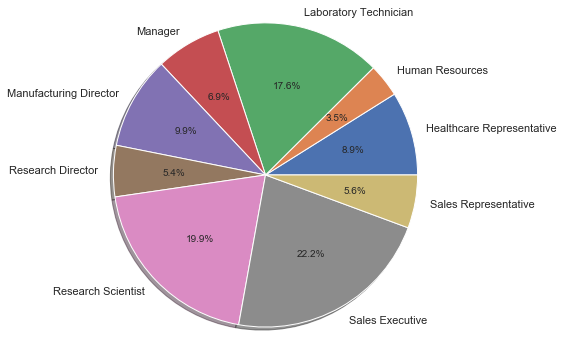

In [15]:
labels = df['JobRole'].astype('category').cat.categories.tolist()
counts = df['JobRole'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
print(sizes)
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

### Data Manuplation in the Dataset

In [16]:
# Data Manuplation in the Dataset
# Data types changes for :Features Variables

# Variables in df needs to be changed to the object type from int64.
df["Education"] = df["Education"].astype(object)
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].astype(object)
df["JobInvolvement"] = df["JobInvolvement"].astype(object)
df["JobLevel"] = df["JobLevel"].astype(object)
df["JobSatisfaction"] = df["JobSatisfaction"].astype(object)
df["PerformanceRating"] = df["PerformanceRating"].astype(object)
df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].astype(object)
df["StockOptionLevel"] = df["StockOptionLevel"].astype(object)
df["TrainingTimesLastYear"] = df["TrainingTimesLastYear"].astype(object)
df["WorkLifeBalance"] = df["WorkLifeBalance"].astype(object)

### Feature engineering 

Data Manuplation in the Dataset and Feature engineering and selection.

Taking sqrt tranformation,so the data distribution look normal Distribution.

Taking log tranformation on Montly Income,so the data distribution look normal Distribution ...

In [17]:
df["TotalWorkingYears"] =np.sqrt(df["TotalWorkingYears"])
df["YearsAtCompany"] =np.sqrt(df["YearsAtCompany"])

# Taking log tranformation,so the data distribution look normal Distribution ...
df["MonthlyIncome"] = np.log(df["MonthlyIncome"])

##### YearsInCurrentRole from the Dataframe ... Explanation as follows

- 0 >YearsInCurrentRole in between 0 and 2 - Termed as Fresher in the Current Role.
- 1 > YearsInCurrentRole in between 3 and 6 - Termed as Intermidate in the Current Role.
- 2 > YearsInCurrentRole in between 7 and 10 - Termed as Experienced in the Current Role.
- 3 > YearsInCurrentRole in between 11 and 18 - Termed as SME in the Current Role.

In [18]:
df.loc[ df['YearsInCurrentRole'] <= 2,'YearsInCurrentRole'] = 0
df.loc[ (df['YearsInCurrentRole'] >=3) & (df['YearsInCurrentRole'] <= 6) ,'YearsInCurrentRole'] = 1
df.loc[ (df['YearsInCurrentRole'] >=7) & (df['YearsInCurrentRole'] <= 10), 'YearsInCurrentRole'] = 2
df.loc[ (df['YearsInCurrentRole'] >=11) & (df['YearsInCurrentRole'] <= 18), 'YearsInCurrentRole'] = 3

##### YearsSinceLastPromotion from the Dataframe ... Explanation as follows

- 0 > YearsSinceLastPromotion in between 0 and 1 - Termed as Less than one Year -- Newly Promoted
- 1 > YearsSinceLastPromotion in between 2 and 4 - Termed as between 2 and 4 year -- Waiting for a while for Promoting 
- 2 > YearsSinceLastPromotion in between 5 and 7 - Termed as between 5 and 7 year -- Too Much Waiting for Promoting
- 3 > YearsSinceLastPromotion in between 8 and 15 - Termed as between 8 and 15 year -- No promotions given for along while

In [19]:
df.loc[ df['YearsSinceLastPromotion'] <= 1,'YearsSinceLastPromotion'] = 0
df.loc[ (df['YearsSinceLastPromotion'] >=2) & (df['YearsSinceLastPromotion'] <= 4) ,'YearsSinceLastPromotion'] = 1
df.loc[ (df['YearsSinceLastPromotion'] >=5) & (df['YearsSinceLastPromotion'] <= 7), 'YearsSinceLastPromotion'] = 2
df.loc[ (df['YearsSinceLastPromotion'] >=8) & (df['YearsSinceLastPromotion'] <= 15), 'YearsSinceLastPromotion'] = 3

##### YearsWithCurrManager from the Dataframe ... Explanation as follows

- 0 > YearsWithCurrManager in between 0 and 1 - Termed as Less than one Year 
- 1 > YearsWithCurrManager in between 2 and 3 - Termed as between 2 and 3 year 
- 2 > YearsWithCurrManager in between 4 and 6 - Termed as between 4 and 6 year 
- 3 > YearsWithCurrManager in between 7 and 9 - Termed as between 7 and 9 year 
- 4 > YearsWithCurrManager in between 10 and 17 - Termed as between 10 and 17 year 

In [20]:
df.loc[ df['YearsWithCurrManager'] < 1,'YearsWithCurrManager'] = 0
df.loc[ (df['YearsWithCurrManager'] >=2) & (df['YearsWithCurrManager'] <= 3) ,'YearsWithCurrManager'] = 1
df.loc[ (df['YearsWithCurrManager'] >=4) & (df['YearsWithCurrManager'] <= 6), 'YearsWithCurrManager'] = 2
df.loc[ (df['YearsWithCurrManager'] >=7) & (df['YearsWithCurrManager'] <= 9), 'YearsWithCurrManager'] = 3
df.loc[ (df['YearsWithCurrManager'] >=10) & (df['YearsWithCurrManager'] <= 17), 'YearsWithCurrManager'] = 4

##### DistanceFromHome from the Dataframe ... Explanation as follows

- 0 > DistanceFromHome in between 0 and 2 - Termed as Less than one Year -- Very close 
- 1 > DistanceFromHome in between 3 and 5 - Termed as between 2 and 4 year -- Normal Distance
- 2 > DistanceFromHome in between 6 and 8 - Termed as between 5 and 8 year -- Modearte DiStance
- 3 > DistanceFromHome in between 9 and 12 - Termed as between 9 and 15 year -- Average DiStance  
- 4 > DistanceFromHome in between 13 and 20 - Termed as between 9 and 15 year -- Little Fare
- 5 > DistanceFromHome in between 21 and 29 - Termed as between 9 and 15 year -- Long Fare away

In [21]:
df.loc[ df['DistanceFromHome'] <= 2,'DistanceFromHome'] = 0
df.loc[ (df['DistanceFromHome'] >=3) & (df['DistanceFromHome'] <= 5) ,'DistanceFromHome'] = 1
df.loc[ (df['DistanceFromHome'] >=6) & (df['DistanceFromHome'] <= 8), 'DistanceFromHome'] = 2
df.loc[ (df['DistanceFromHome'] >=9) & (df['DistanceFromHome'] <= 12), 'DistanceFromHome'] = 3
df.loc[ (df['DistanceFromHome'] >=13) & (df['DistanceFromHome'] <= 20), 'DistanceFromHome'] = 4
df.loc[ (df['DistanceFromHome'] >=21) & (df['DistanceFromHome'] <= 29), 'DistanceFromHome'] = 5

##### NumCompaniesWorked from the Dataframe ... Explanation as follows

0 > NumCompaniesWorked in between 0 and 2 - Termed as Less than one Year -- Very close 
1 > NumCompaniesWorked in between 3 and 5 - Termed as between 2 and 4 year -- Normal Distance
2 > NumCompaniesWorked in between 6 and 8 - Termed as between 5 and 8 year -- Modearte DiStance
3 > NumCompaniesWorked in between 9 and 12 - Termed as between 9 and 15 year -- Average DiStance  
4 > NumCompaniesWorked in between 13 and 20 - Termed as between 9 and 15 year -- Little Fare
5 > NumCompaniesWorked in between 21 and 29 - Termed as between 9 and 15 year -- Long Fare away

In [22]:
df.loc[ df['NumCompaniesWorked'] <= 1,'NumCompaniesWorked'] = 0
df.loc[ (df['NumCompaniesWorked'] >=2) & (df['NumCompaniesWorked'] <= 4) ,'NumCompaniesWorked'] = 1
df.loc[ (df['NumCompaniesWorked'] >=5) & (df['NumCompaniesWorked'] <= 6), 'NumCompaniesWorked'] = 2
df.loc[ (df['NumCompaniesWorked'] >=7) & (df['NumCompaniesWorked'] <= 9), 'NumCompaniesWorked'] = 3

##### PercentSalaryHike from the Dataframe ... Explanation as follows

- 0 > PercentSalaryHike in between 11 and 12 - Termed as Less than one Year
- 1 > PercentSalaryHike in between 13 and 14 - Termed as between 2 and 4 year 
- 2 > PercentSalaryHike in between 15 and 18 - Termed as between 5 and 8 year 
- 3 > PercentSalaryHike in between 19 and 21 - Termed as between 9 and 15 year
- 4 > PercentSalaryHike in between 22 and 25 - Termed as between 9 and 15 year 

In [23]:
df.loc[ df['PercentSalaryHike'] <= 12,'PercentSalaryHike'] = 0
df.loc[ (df['PercentSalaryHike'] >=13) & (df['PercentSalaryHike'] <= 14) ,'PercentSalaryHike'] = 1
df.loc[ (df['PercentSalaryHike'] >=15) & (df['PercentSalaryHike'] <= 18), 'PercentSalaryHike'] = 2
df.loc[ (df['PercentSalaryHike'] >=19) & (df['PercentSalaryHike'] <= 21), 'PercentSalaryHike'] = 3
df.loc[ (df['PercentSalaryHike'] >=22) & (df['PercentSalaryHike'] <= 25), 'PercentSalaryHike'] = 4

###### Data Manuplation in the Converted Object variables
###### Data types changes for :Features Variables

In [24]:
df["YearsInCurrentRole"] = df["YearsInCurrentRole"].astype(object)
df["YearsSinceLastPromotion"] = df["YearsSinceLastPromotion"].astype(object)
df["YearsWithCurrManager"] = df["YearsWithCurrManager"].astype(object)
df["DistanceFromHome"] = df["DistanceFromHome"].astype(object)
df["NumCompaniesWorked"] = df["NumCompaniesWorked"].astype(object)
df["PercentSalaryHike"] = df["PercentSalaryHike"].astype(object)

In [25]:
#EDA on Feature Variables
print(list(set(df.dtypes.tolist())))
df_object = df.select_dtypes(include=["object"]).copy()
df_int = df.select_dtypes(include=['int64','float64']).copy()

categorical = df_object.columns
numerical = df_int.columns

print("Datashape of Object Dataframe:",df_object.shape)
print("Datashape of Interger Dataframe:",df_int.shape)

[dtype('float64'), dtype('O'), dtype('int64')]
Datashape of Object Dataframe: (1470, 23)
Datashape of Interger Dataframe: (1470, 8)


### Feature selection

In [26]:
# Features encoding and scaling
# Preprocessing packages 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Model selection for Train and Test split the dataset
from sklearn.model_selection import train_test_split

In [27]:
def feature_imp_Dataset(df):
    #Target Columns
    target_col = ["Attrition"]

    #Categorical Columns
    cat_cols = df.nunique()[df.nunique() < 10].keys().tolist()
    cat_cols = [x for x in cat_cols if x not in target_col]

    #numerical columns
    num_cols = [x for x in df.columns if x not in cat_cols + target_col]

    #Binary columns with 2 values
    bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()

    #Columns more than 2 values
    multi_cols = [i for i in cat_cols if i not in bin_cols] 
    
    df_feature_imp = df.copy()
    
    #Label encoding Binary columns
    le = LabelEncoder()
    for i in cat_cols:
        df_feature_imp[i] = le.fit_transform(df_feature_imp[i])

    #Dulpicating columns for Multiple value columns
    #df = pd.get_dummies(data=df,columns= multi_cols,drop_first=True)
    df_feature_imp= pd.get_dummies(data=df_feature_imp,columns= multi_cols)
    
    return df_feature_imp

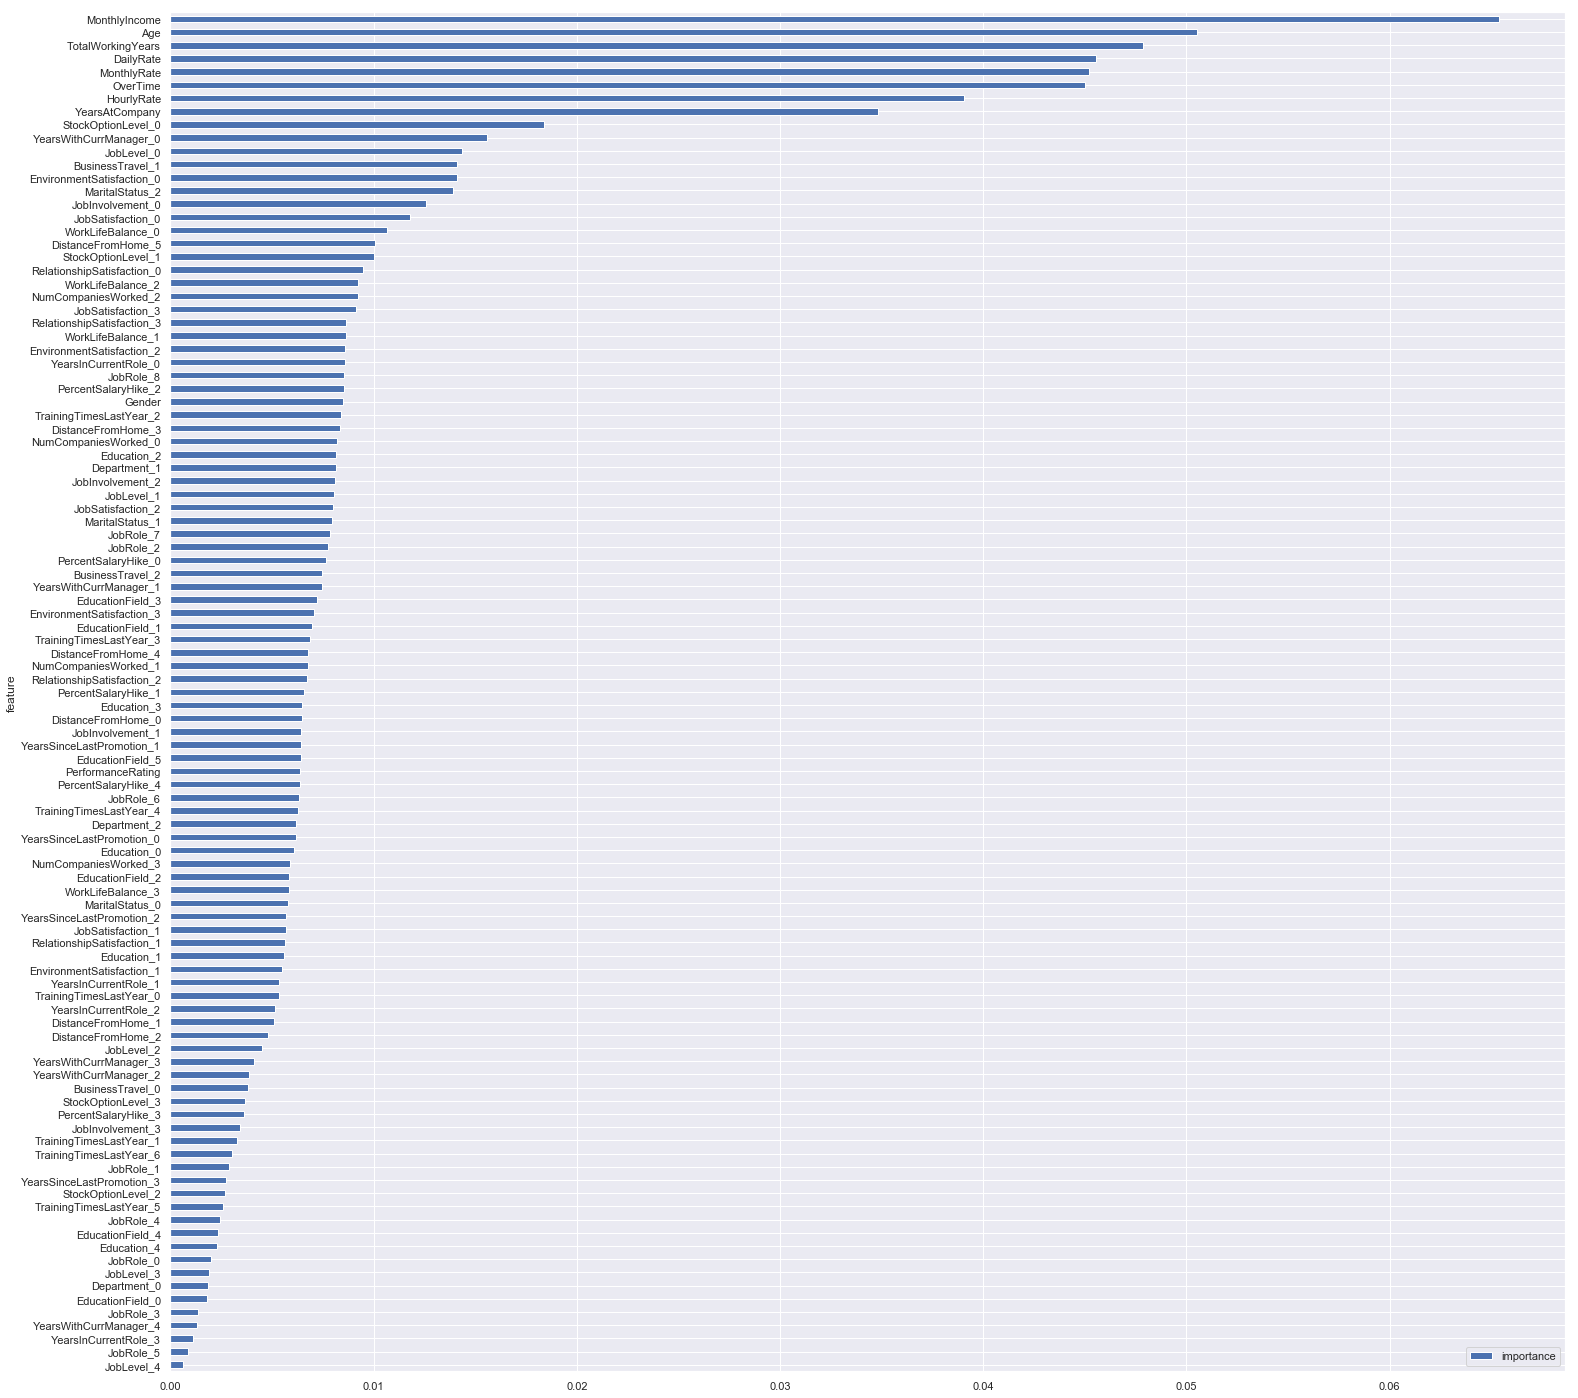

In [28]:
# Feature selection

# Inorder to avoid the Dummy trap, we are removing the less Importance Dummy Varaible columns...
# For this we are using the Random Forest to select the Importance Feature...
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt')

# Loading the dataset:
df_feature_imp = feature_imp_Dataset(df)

# Def X and Y for Unscaled Dataset
target_col = ["Attrition"]
y = pd.DataFrame(df_feature_imp,columns=target_col)
#y = df_unscaled["Attrition"]
X = df_feature_imp.drop('Attrition',1)

# Fit the Model with the X and y ...
clf = clf.fit(X, y)
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(25, 25))

### Overcome Dummy Trap 

In [29]:
# As per the Importance Features Techinque With the help of Random Forest Classifier we could see the below Dummy Variables
# has less Importance compared to other Dummy variables, so we are removing those variables.

to_drop_dummy_variable_trap= ['BusinessTravel_0','Department_0','DistanceFromHome_2','Education_4','EducationField_0','EnvironmentSatisfaction_1',
 'JobInvolvement_3','JobLevel_3','JobRole_4','JobSatisfaction_1','MaritalStatus_0','NumCompaniesWorked_1','PercentSalaryHike_3',
 'RelationshipSatisfaction_1','StockOptionLevel_2','TrainingTimesLastYear_5','WorkLifeBalance_3','YearsInCurrentRole_3','YearsInCurrentRole_3',
 'YearsWithCurrManager_4']
#df = df.drop(columns=to_drop_dummy_variable_trap)

### Correlation Matrix : With respect to Depedent variable

In [30]:
# Correlation Matrix - Orginal Dataset ...

#correlation for Orginal Dataset
correlation = df.corr()

#tick labels
#matrix_cols = correlation.columns.tolist()
#convert to array
#corr_array  = np.array(correlation)

# Viewing the Correlation with respect to Attrition ...
corr_list = correlation['Attrition'].sort_values(axis=0,ascending=False)#.iloc[1:]
#corr_list

### Data Prepartion 

In [31]:
from sklearn.utils.class_weight import compute_class_weight
def _compute_class_weight_dictionary(y):
    # helper for returning a dictionary instead of an array
    classes = np.unique(y)
    class_weight = compute_class_weight("balanced", classes, y)
    class_weight_dict = dict(zip(classes, class_weight))
    return class_weight_dict   

In [32]:
y=df["Attrition"]
print("Class Weight for the Attrition Attribute:")
_compute_class_weight_dictionary(y)

Class Weight for the Attrition Attribute:


{0: 0.5961070559610706, 1: 3.1012658227848102}

####  Unsacled Dataset(Dataframe as its given...)

Here we have created a copy of the dataset after Feature engineering.

The below steps were taken as part of this funtion:

 - Label Encoded the categorical columns which has less than 10 unique elements.
 - Removed the variables which has more the 0.7 correlation value with respect to independent variables.
 - Removed some of the categorical variables which we converted with LabelEncoder inorder to avoid the Dummy Variable trap.
 - Split the Dataset to train and test for further techinques.

In [33]:
def unscaled_data(df):
    #global to_drop_dummy_variable_trap
    #Target Columns
    target_col = ["Attrition"]

    #Categorical Columns
    cat_cols = df.nunique()[df.nunique() < 10].keys().tolist()
    cat_cols = [x for x in cat_cols if x not in target_col]

    #numerical columns
    num_cols = [x for x in df.columns if x not in cat_cols + target_col]

    #Binary columns with 2 values
    bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()

    #Columns more than 2 values
    multi_cols = [i for i in cat_cols if i not in bin_cols]
    
    df_unscaled = df.copy()

    #Label encoding Binary columns
    le = LabelEncoder()
    for i in cat_cols:
        df_unscaled[i] = le.fit_transform(df_unscaled[i])

    #Dulpicating columns for Multiple value columns
    #df = pd.get_dummies(data=df,columns= multi_cols,drop_first=True)
    df_unscaled= pd.get_dummies(data=df_unscaled,columns= multi_cols)

    #Dropping original values merging scaled values for numerical columns
    #f_unscaled = df.copy()
    
    ###############################################################################
    # Remove collinear features for Unscaled Dataset ...
    # Threshold to remove correlated Variables
    threshold = 0.7
    #0.8 - Initailly i have taken as

    # Absolute value of corelation matrix
    corr_matrix = df_unscaled.corr().abs()
    corr_matrix.head()

    # Upper triangle of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    upper.head()

    # Select columns with correlations above threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print('There are %d columns to remove:' %(len(to_drop)))
    print("Threshold more than %s \n" %threshold ,to_drop)
    df_unscaled = df_unscaled.drop(columns=to_drop)
    
    #Columns thats is to avoid dummy variable trap: to_drop_dummy_variable_trap
    
    to_drop_dummy_variable_trap_un = [i for i in to_drop_dummy_variable_trap if i not in to_drop]
    df_unscaled = df_unscaled.drop(columns=to_drop_dummy_variable_trap_un)
    print("\nRemoving variables to avoid Dummy variable trap:\n")
    print(to_drop_dummy_variable_trap_un)
    print("\n")
    
    ###############################################################################
    #y=df_unscaledl["Attrition"]
    #print("Class Weight for the Attrition Attribute:\n")
    #_compute_class_weight_dictionary(y)
    #print("\n")
    
    ###############################################################################
    # Prepare dataset
    # Define (X, y)

    # Def X and Y for Unscaled Dataset
    y = pd.DataFrame(df_unscaled,columns=target_col)
    #y = df_unscaled["Attrition"]
    X = df_unscaled.drop('Attrition',1)
    
    # execute this step if you need the Orginal "Train test split :X_train, X_test, y_train, y_test" 
    random_state =0
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = random_state)
    # Defining Cols variables to store the Column names of X Unscaled dataframe.
    cols = X_train.columns
    
    return X_train,X_test,y_train,y_test,cols,X,y

####  Scaled Dataset

Here we have created a copy of the dataset after Feature engineering.

The below steps were taken as part of this funtion:

- Label Encoded the categorical columns which has less than 10 unique elements.
- Removed the variables which has more the 0.7 correlation value with respect to independent variables.
- Scaled the numerical variable inorder to standardize.
- Removed some of the categorical variables which we converted with LabelEncoder inorder to avoid the Dummy Variable trap.
- Split the Dataset to train and test for further techinques.

In [34]:
def scaled_data(df):
    #Target Columns
    target_col = ["Attrition"]

    #Categorical Columns
    cat_cols = df.nunique()[df.nunique() < 10].keys().tolist()
    cat_cols = [x for x in cat_cols if x not in target_col]

    #numerical columns
    num_cols = [x for x in df.columns if x not in cat_cols + target_col]

    #Binary columns with 2 values
    bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()

    #Columns more than 2 values
    multi_cols = [i for i in cat_cols if i not in bin_cols]
    
    df_scaled = df.copy()
    
    #Label encoding Binary columns
    le = LabelEncoder()
    for i in cat_cols:
        df_scaled[i] = le.fit_transform(df_scaled[i])

    #Dulpicating columns for Multiple value columns
    #df = pd.get_dummies(data=df,columns= multi_cols,drop_first=True)
    df_scaled = pd.get_dummies(data=df_scaled,columns= multi_cols)

    #Scaling the Numerical columns
    std = StandardScaler()
    scaled = std.fit_transform(df_scaled[num_cols])
    scaled = pd.DataFrame(scaled,columns=num_cols)

    #Dropping original values merging scaled values for numerical columns
    df_scaled = df_scaled.drop(columns= num_cols,axis=1)
    df_scaled = df_scaled.merge(scaled,left_index=True,right_index=True,how="left")
    
    ###############################################################################
    # Threshold to remove correlated Variables
    threshold = 0.7
    #0.8 - Initailly i have taken as

    # Absolute value of corelation matrix
    corr_matrix = df_scaled.corr().abs()
    corr_matrix.head()

    # Upper triangle of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    upper.head()

    # Select columns with correlations above threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print('There are %d columns to remove:' %(len(to_drop)))
    print("Threshold more than %s \n" %threshold ,to_drop)
    df_scaled = df_scaled.drop(columns=to_drop)
    print(to_drop)
    
    #Columns thats is to avoid dummy variable trap: to_drop_dummy_variable_trap
    
    to_drop_dummy_variable_trap_un = [i for i in to_drop_dummy_variable_trap if i not in to_drop]
    df_scaled = df_scaled.drop(columns=to_drop_dummy_variable_trap_un)
    print("\nRemoving variables to avoid Dummy variable trap:\n")
    print(to_drop_dummy_variable_trap_un)
    print("\n")
    
    ###############################################################################
    # Def X and Y for Scaled Dataset
    y_scale = pd.DataFrame(df_scaled,columns=target_col)
    #y = df_unscaled["Attrition"]
    X_scale = df_scaled.drop('Attrition',1)
    
    ###############################################################################   
    # execute this step if you need the Scaled "Train test split :X_train, X_test, y_train, y_test" 
    random_state = 0
    X_train, X_test, y_train, y_test = train_test_split(X_scale,y_scale, test_size = 0.30, random_state = random_state)
    # Defining Cols variables to store the Column names of X scaled dataframe.
    cols = X_train.columns
    
    return X_train, X_test, y_train, y_test,cols,X_scale,y_scale

#### Cross Validation Scores

In [35]:
def cross_validate_(model,X,y,num_validations=5):
    accuracy_train = cross_val_score(model,X,y,scoring="accuracy",cv=num_validations)
    precision_train = cross_val_score(model,X,y,scoring="precision",cv=num_validations)
    recall_train = cross_val_score(model,X,y,scoring="recall",cv=num_validations)
    f1_train = cross_val_score(model,X,y,scoring="f1_weighted",cv=num_validations)                                  
    
    print("Cross Validation of : {}".format(model.__class__.__name__))
    print('*********************')
    print(" Model :",model)
    #print("Transforming {}".format(transformer.__class__.__name__))
    print("Accuracy: " , round(100*accuracy_train.mean(), 2))
    print("Precision: ",  round(100*precision_train.mean(), 2))
    print("Recall: ",  round(100*recall_train.mean(), 2))
    print("F1 Score: ",  round(100*f1_train.mean(), 2))
    print('**************************************************************************\n')


### Modelling

##### Loading neccesary libraries ...

In [36]:
# Modelling
# Baseline Model

# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm


# Scoring functions
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_error


### Basics function for Prediction

##### Function which can predict the Accuracy and Area under the curve(AUC) of test data from Train dataset in a single shot ...

In [37]:
# Basics function for Prediction
# Function which can predict the Accuracy and Area under the curve(AUC) of test data from Train dataset in a single shot ...

def Attrition_prediction(algorthim,train_x,test_x,train_y,test_y,cols):
    
    #model
    algorthim.fit(train_x,train_y)
    predictions = algorthim.predict(test_x)
    #probabilities = algorthim.predict_proba(test_x)
     
    #roc_auc_score
    model_roc_auc = roc_auc_score(test_y,predictions)
    
    #RMSE values of Train Model ...
    train_y_pred = algorthim.predict(train_x)
    confusion_matrix(train_y,train_y_pred)

    final_mse = mean_squared_error(train_y,train_y_pred) 
    train_final_rmse = np.sqrt(final_mse)
    
    #RMSE values of Test Model ...
    final_mse = mean_squared_error(test_y,predictions) 
    test_final_rmse = np.sqrt(final_mse)
    
    #Confusion Matrix for Train Model ...
    confuse_train = confusion_matrix(train_y, train_y_pred)
    
    #Confusion Matrix for Train Model ...
    confuse_test = confusion_matrix(test_y, predictions)
    
    print("Algorthims parameters used :\n\n",algorthim)
    print("\n Classification Report :\n", classification_report(test_y,predictions))
    print("Accuracy Score of Train :", accuracy_score(train_y,train_y_pred),"\n")
    print("Accuracy Score of Test :", accuracy_score(test_y,predictions),"\n")
    print("Area under the curve :",model_roc_auc,"\n")
    print("RMSE of the Train Model :",train_final_rmse,"\n")
    print("Confusion Matrix of the Train Model :\n",confuse_train)
    print("RMSE of the Test Model :",test_final_rmse,"\n")
    print("Confusion Matrix of the Test Model :\n",confuse_test)


## Let's try different base models

### Cross Validation

In this method we will use cross validation techinque into different Machine learning algorthims by using the all dataset inorder to calculate which Algorthims shows better:
 - Accuracy
 - Precision
 - Recall
 - F1 Score

In [38]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
random_f = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC(kernel='linear')
xgb = XGBClassifier()

classifiers = [logreg, logreg_cv, random_f, knn, svc, xgb]

##### Cross Validation: Unscaled Dataset:

In [83]:
X_train,X_test,y_train,y_test,cols,X,y=unscaled_data(df)
print('**************************************************************************\n')
for model in classifiers:
    cross_validate_(model,X,y,num_validations=7)

There are 10 columns to remove:
Threshold more than 0.7 
 ['TotalWorkingYears', 'BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobLevel_0', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


**************************************************************************

Cross Validation of : LogisticRegression
*********************
 Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, mul

##### Cross Validation: Scaled Dataset

In [40]:
X_train,X_test,y_train,y_test,cols,X,y=scaled_data(df)
print('**************************************************************************\n')
for model in classifiers:
    cross_validate_(model,X,y,num_validations=7)

There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


**************************************************************************

Cross 

## Bagging Techinque

#### Bagging different Machine Learning Techinques ...

In [41]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
random_f = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC()
xgb = XGBClassifier()
from sklearn.ensemble import BaggingClassifier
classifiers = [logreg, logreg_cv, random_f, knn, svm, xgb]

##### Bagging Techinque: Unscaled Dataset

In [42]:
X_train,X_test,y_train,y_test,cols,X,y=unscaled_data(df)
print('**************************************************************************\n')
for model in classifiers:
    print("Bagging Techinque on :{}".format(model.__class__.__name__))
    print("**********************")
    print("Model used:", model)
    bag_model = BaggingClassifier(base_estimator=model,n_estimators=100,bootstrap=True)
    bag_model = bag_model.fit(X_train,y_train)
    ytest_pred = bag_model.predict(X_test)
    print("Bagging Accuarcy :", bag_model.score(X_test,y_test))
    print("Confusin Matrix :\n ", confusion_matrix(y_test,ytest_pred))
    print("***************************************************************************\n")
    

There are 10 columns to remove:
Threshold more than 0.7 
 ['TotalWorkingYears', 'BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobLevel_0', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


**************************************************************************

Bagging Techinque on :LogisticRegression
**********************
Model used: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100,

##### Bagging Techinque: Scaled Dataset

In [43]:
X_train,X_test,y_train,y_test,cols,X,y=scaled_data(df)
print('**************************************************************************\n')
for model in classifiers:
    print("Bagging Techinque on :{}".format(model.__class__.__name__))
    print("**********************")
    print("Model used:", model)
    bag_model = BaggingClassifier(base_estimator=model,n_estimators=100,bootstrap=True)
    bag_model = bag_model.fit(X_train,y_train)
    ytest_pred = bag_model.predict(X_test)
    print("Bagging Accuarcy :", bag_model.score(X_test,y_test))
    print("Confusin Matrix :\n ", confusion_matrix(y_test,ytest_pred))
    print("***************************************************************************\n")
    

There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


**************************************************************************

Baggin

### Auto ML method: TPOT

##### Loading the libraries:

In [78]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor

##### Calling the Tpot Classifier for Unscaled dataset...

In [79]:
tpot = TPOTClassifier(generations=5,verbosity=2)
X_train,X_test,y_train,y_test,cols,X,y=unscaled_data(df)
tpot.fit(X_train.values,y_train.values)

There are 10 columns to remove:
Threshold more than 0.7 
 ['TotalWorkingYears', 'BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobLevel_0', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']




Generation 1 - Current best internal CV score: 0.8814563449982324
Generation 2 - Current best internal CV score: 0.8814563449982324
Generation 3 - Current best internal CV score: 0.8814563449982324
Generation 4 - Current best internal CV score: 0.8814563449982324
Generation 5 - Current best internal CV score: 0.8814563449982324

Best pipeline: LogisticRegression(MaxAbsScaler(input_matrix), C=0.5, dual=True, penalty=l2)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=5,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=100,
        random_state=None, scoring=None, subsample=1.0, template=None,
        use_dask=False, verbosity=2, warm_start=False)

##### Evaluate the Score of the TPOT Unscaled Dateset

In [80]:
tpot.score(X_test.values,y_test.values)

0.8866213151927438

##### Export the TPOT Unscaled PIPELINE Python file

In [ ]:
tpot.export('tpot_Attrition_modeling_pipeline.py')

##### Calling the Tpot Classifier for Scaled dataset...

In [81]:
tpot = TPOTClassifier(generations=5,verbosity=2)
X_train,X_test,y_train,y_test,cols,X,y=scaled_data(df)
tpot.fit(X_train.values,y_train.values)

There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']




Generation 1 - Current best internal CV score: 0.8717473783433487
Generation 2 - Current best internal CV score: 0.8727135619182279
Generation 3 - Current best internal CV score: 0.8843360433604335
Generation 4 - Current best internal CV score: 0.8843360433604335
Generation 5 - Current best internal CV score: 0.8843360433604335

Best pipeline: KNeighborsClassifier(GaussianNB(StandardScaler(LogisticRegression(input_matrix, C=5.0, dual=False, penalty=l1))), n_neighbors=29, p=2, weights=uniform)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=5,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=100,
        random_state=None, scoring=None, subsample=1.0, template=None,
        use_dask=False, verbosity=2, warm_start=False)

##### Evaluate the Score of the TPOT Unscaled Dateset

In [82]:
tpot.score(X_test.values,y_test.values)

0.8820861678004536

##### Export the TPOT Scaled PIPELINE Python file

In [ ]:
tpot.export('tpot_Attrition_modeling_scaled_pipeline.py')

### Logistic Regression...

#### Using Unscaled Data

In [44]:
#Logistic Regression...

# Using Unscaled Data set for Logistic Regression...

classifier = LogisticRegression()
X_train,X_test,y_train,y_test,cols,X,y=unscaled_data(df)
Attrition_prediction(classifier,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['TotalWorkingYears', 'BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobLevel_0', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Algorthims parameters used :

 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose

#### Using Scaled Data

In [45]:
#Logistic Regression...

# Using Scaled Data set for Logistic Regression...

classifier = LogisticRegression()
X_train,X_test,y_train,y_test,cols,X,y=scaled_data(df)
Attrition_prediction(classifier,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Algorthims parameters used :

 LogisticRegression(C=1.0, class_weight=None, dual=F

### Grid Search on Logistic Regression

##### Unscaled Dataset

In [46]:
# Grid Search on Logistic Regression ...

# Fit the parameters for logistic regression ...

param_grid = {'C':np.logspace(-3,3,8),'penalty':["l1","l2"],'max_iter':[100],'intercept_scaling':[1]}
log_param_grid = GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=10,refit=True,verbose=1)

X_train,X_test,y_train,y_test,cols,X,y=unscaled_data(df)
#Applying Grid Search on Orginal Dataset ...
log_param_grid.fit(X_train,y_train)
# Find the best estimator from the model ...
final_model=log_param_grid.best_estimator_
# Predicting the Accuracy and AUC value from the function we defined above ...
Attrition_prediction(final_model,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['TotalWorkingYears', 'BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobLevel_0', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Algorthims parameters used :

 LogisticRegression(C=0.3727593720314938, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

 Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.99      0.93       371
           1       0.82      0.33      0.47        70

   micro avg       0.88      0.88      0.88       441
   macro avg       0.85      0.66      0.70       441
weighted avg       0.88      0.88      0.86       441

Accuracy Score of Train : 0.8960155490767736 

Accuracy Score of Test : 0.8820861678004536 

Area under the curve : 0.6575471698113207 

RMSE of the Train Model : 0.3224662012106485 

Confusion Matrix of the Train Model :
 [[853   9]
 [ 98  69]]
RMSE of the Test Model : 0.3433858357584752 

Confusion Matrix of the Test Model :
 [[366 

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    4.0s finished


##### Scaled Data

In [47]:
# Grid Search on Logistic Regression ...

# Fit the parameters for logistic regression ...

param_grid = {'C':np.logspace(-3,3,8),'penalty':["l1","l2"],'max_iter':[100],'intercept_scaling':[0.97,0.98,1]}
log_param_grid = GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=7,refit=True,verbose=1)

X_train,X_test,y_train,y_test,cols,X,y=scaled_data(df)
#Applying Grid Search on Orginal Dataset ...
log_param_grid.fit(X_train,y_train)
# Find the best estimator from the model ...
final_model=log_param_grid.best_estimator_
# Predicting the Accuracy and AUC value from the function we defined above ...
Attrition_prediction(final_model,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Fitting 7 folds for each of 48 candidates, totalling 336 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Algorthims parameters used :

 LogisticRegression(C=0.3727593720314938, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=0.97, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

 Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       371
           1       0.87      0.37      0.52        70

   micro avg       0.89      0.89      0.89       441
   macro avg       0.88      0.68      0.73       441
weighted avg       0.89      0.89      0.87       441

Accuracy Score of Train : 0.8960155490767736 

Accuracy Score of Test : 0.891156462585034 

Area under the curve : 0.6803234501347709 

RMSE of the Train Model : 0.3224662012106485 

Confusion Matrix of the Train Model :
 [[853   9]
 [ 98  69]]
RMSE of the Test Model : 0.329914439536929 

Confusion Matrix of the Test Model :
 [[367

[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed:   11.7s finished


### KNN

##### Using Unscaled Dataset

In [48]:
# KNN ...
# Using Unscaled Data set for KNN...
classifier = KNeighborsClassifier()
X_train,X_test,y_train,y_test,cols,X,y=unscaled_data(df)
Attrition_prediction(classifier,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['TotalWorkingYears', 'BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobLevel_0', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Algorthims parameters used :

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

 Classification Report :
               precision    recall  f1-score   su

#### Using Scaled Dataset

In [49]:
# Using Scaled Data set for KNN...
classifier = KNeighborsClassifier()
X_train,X_test,y_train,y_test,cols,X,y=scaled_data(df)
Attrition_prediction(classifier,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Algorthims parameters used :

 KNeighborsClassifier(algorithm='auto', leaf_size=30

#### Grid Search on KNN Scaled Dataset ...

In [50]:
# Grid Search on KNN Scaled Dataset ...

# Fit the parameters for KNN ...
param_grid = {'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'metric':['euclidean','manhattan','minkowski'],
             'leaf_size':[40,45,50,60]}
knn_param_grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=7,refit=True,n_jobs=-1,verbose=1)
X_train,X_test,y_train,y_test,cols,X,y=scaled_data(df)

#Applying Grid Search on Orginal Dataset ...
knn_param_grid.fit(X_train,y_train)
# Find the best estimator from the model ...
final_model=knn_param_grid.best_estimator_
# Predicting the Accuracy and AUC value from the function we defined above ...
Attrition_prediction(final_model,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Fitting 7 folds for each of 96 candidates, totalling 672 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 672 out of 672 | elapsed:   48.1s finished


Algorthims parameters used :

 KNeighborsClassifier(algorithm='auto', leaf_size=40, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

 Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       371
           1       0.54      0.10      0.17        70

   micro avg       0.84      0.84      0.84       441
   macro avg       0.70      0.54      0.54       441
weighted avg       0.80      0.84      0.80       441

Accuracy Score of Train : 0.8658892128279884 

Accuracy Score of Test : 0.8435374149659864 

Area under the curve : 0.5419137466307279 

RMSE of the Train Model : 0.36621139683523185 

Confusion Matrix of the Train Model :
 [[856   6]
 [132  35]]
RMSE of the Test Model : 0.3955535172818131 

Confusion Matrix of the Test Model :
 [[365   6]
 [ 63   7]]


#### Grid Search on KNN UnScaled Dataset ...

In [51]:
# Grid Search on KNN unScaled Dataset ...

# Fit the parameters for KNN ...
param_grid = {'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance'],'metric':['euclidean','manhattan','minkowski'],
             'leaf_size':[60,90,100,150,200,300]}
knn_param_grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=7,refit=True,n_jobs=-1,verbose=1)
X_train,X_test,y_train,y_test,cols,X,y=unscaled_data(df)

#Applying Grid Search on Orginal Dataset ...
knn_param_grid.fit(X_train,y_train)
# Find the best estimator from the model ...
final_model=knn_param_grid.best_estimator_
# Predicting the Accuracy and AUC value from the function we defined above ...
Attrition_prediction(final_model,X_train,X_test,y_train,y_test,cols)


There are 10 columns to remove:
Threshold more than 0.7 
 ['TotalWorkingYears', 'BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobLevel_0', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Fitting 7 folds for each of 180 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   18.6s


Algorthims parameters used :

 KNeighborsClassifier(algorithm='auto', leaf_size=60, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

 Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       371
           1       0.33      0.01      0.03        70

   micro avg       0.84      0.84      0.84       441
   macro avg       0.59      0.50      0.47       441
weighted avg       0.76      0.84      0.77       441

Accuracy Score of Train : 0.8367346938775511 

Accuracy Score of Test : 0.8390022675736961 

Area under the curve : 0.5044474393530998 

RMSE of the Train Model : 0.40406101782088427 

Confusion Matrix of the Train Model :
 [[856   6]
 [162   5]]
RMSE of the Test Model : 0.4012452272941123 

Confusion Matrix of the Test Model :
 [[369   2]
 [ 69   1]]


[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed:   29.1s finished


### Random Forest 

##### Using Scaled Data set for Random Forest ...

In [52]:
# Random Forest 

#Create a Gaussian Classifier ...
# Using scaled Data set for Random Forest ...
classifier = RandomForestClassifier()
X_train,X_test,y_train,y_test,cols,X,y=scaled_data(df)
Attrition_prediction(classifier,X_train,X_test,y_train,y_test,cols)


There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Algorthims parameters used :

 RandomForestClassifier(bootstrap=True, class_weight

##### Using Unscaled Data set for Random Forest ..

In [53]:
#Create a Gaussian Classifier ...
# Using Unscaled Data set for Random Forest ...
classifier = RandomForestClassifier()
X_train,X_test,y_train,y_test,cols,X,y=unscaled_data(df)
Attrition_prediction(classifier,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['TotalWorkingYears', 'BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobLevel_0', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Algorthims parameters used :

 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, 

##### Grid Search on Random Forest Scaled Dataset ...

In [54]:
# Grid Search on Random Forest Scaled Dataset ...

# Fit the parameters for Random Forest ...
param_grid = {'max_depth':[3,4,5,6],'max_features':['sqrt', 'auto', 'log2'],'n_estimators':[50,100],
             'min_samples_split':[2,3,5,6,7],'bootstrap':[True,False],'min_samples_leaf':[1,3,10]}
class_weight = dict({0: 0.5961070559610706, 1: 3.1012658227848102})
cross_validation = StratifiedKFold(n_splits=10)
RF_param_grid = GridSearchCV(RandomForestClassifier(class_weight=class_weight),param_grid,cv=cross_validation,refit=True,n_jobs=-1,verbose=1)

X_train,X_test,y_train,y_test,cols,X,y=scaled_data(df)

#Applying Grid Search on Orginal Dataset ...
RF_param_grid.fit(X_train,y_train)
# Find the best estimator from the model ...
final_model=RF_param_grid.best_estimator_
# Predicting the Accuracy and AUC value from the function we defined above ...
Attrition_prediction(final_model,X_train,X_test,y_train,y_test,cols)


There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3576 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4876 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 6376 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  6.2min finished


Algorthims parameters used :

 RandomForestClassifier(bootstrap=True,
            class_weight={0: 0.5961070559610706, 1: 3.1012658227848102},
            criterion='gini', max_depth=6, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

 Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       371
           1       0.45      0.39      0.42        70

   micro avg       0.83      0.83      0.83       441
   macro avg       0.67      0.65      0.66       441
weighted avg       0.82      0.83      0.82       441

Accuracy Score of Train : 0.9144800777453839 

Accuracy Score of Test : 0.8276643990929705 

Area under the curve : 0.6483827493261456 

RMS

##### Grid Search on Random Forest Unscaled Dataset ...

In [55]:
# Grid Search on Random Forest UnScaled Dataset ...

# Fit the parameters for Random Forest ...
param_grid = {'max_depth':[3,4,5,6],'max_features':['sqrt', 'auto', 'log2'],'n_estimators':[50,100],
             'min_samples_split':[2,3,5,6,7],'bootstrap':[True,False],'min_samples_leaf':[1,3,10]}
cross_validation = StratifiedKFold(n_splits=10)
class_weight = dict({0: 0.5961070559610706, 1: 3.1012658227848102})
RF_param_grid = GridSearchCV(RandomForestClassifier(class_weight=class_weight),param_grid,cv=cross_validation,refit=True,n_jobs=-1,verbose=1)

X_train,X_test,y_train,y_test,cols,X,y=unscaled_data(df)

#Applying Grid Search on Orginal Dataset ...
RF_param_grid.fit(X_train,y_train)
# Find the best estimator from the model ...
final_model=RF_param_grid.best_estimator_
# Predicting the Accuracy and AUC value from the function we defined above ...
Attrition_prediction(final_model,X_train,X_test,y_train,y_test,cols)


There are 10 columns to remove:
Threshold more than 0.7 
 ['TotalWorkingYears', 'BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobLevel_0', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3576 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4876 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6376 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  6.7min finished


Algorthims parameters used :

 RandomForestClassifier(bootstrap=True,
            class_weight={0: 0.5961070559610706, 1: 3.1012658227848102},
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

 Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       371
           1       0.48      0.36      0.41        70

   micro avg       0.84      0.84      0.84       441
   macro avg       0.68      0.64      0.66       441
weighted avg       0.82      0.84      0.83       441

Accuracy Score of Train : 0.9203109815354713 

Accuracy Score of Test : 0.8367346938775511 

Area under the curve : 0.6421832884097035 

RMS

### Support Vector Machine

##### Using Unscaled Data set...

In [56]:
# Support Vector Machine

# Using Unscaled Data set.
classifier = SVC(kernel='linear')
X_train,X_test,y_train,y_test,cols,X,y=unscaled_data(df)
Attrition_prediction(classifier,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['TotalWorkingYears', 'BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobLevel_0', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Algorthims parameters used :

 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

 C

##### Using Scaled Data set...

In [57]:
# Using Scaled Data set ...
classifier = SVC(kernel='linear')
X_train,X_test,y_train,y_test,cols,X,y=scaled_data(df)
Attrition_prediction(classifier,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Algorthims parameters used :

 SVC(C=1.0, cache_size=200, class_weight=None, coef0

##### Grid Search on SVM Scaled Dataset ...

In [58]:
# Grid Search on SVM Scaled Dataset ...

# Fit the parameters for SVM ...
param_grid = {'C':[0.45,0.5,0.51,0.53,0.55,1,1.5,5],'kernel': ['linear']}
cross_validation = StratifiedKFold(n_splits=10)
SVC_param_grid = GridSearchCV(SVC(),param_grid,cv=cross_validation,refit=True,n_jobs=-1,verbose=1)
X_train,X_test,y_train,y_test,cols,X,y=scaled_data(df)

#Applying Grid Search on Orginal Dataset ...
SVC_param_grid.fit(X_train,y_train)
# Find the best estimator from the model ...
final_model=SVC_param_grid.best_estimator_
# Predicting the Accuracy and AUC value from the function we defined above ...
Attrition_prediction(final_model,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s


Algorthims parameters used :

 SVC(C=0.55, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

 Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       371
           1       0.81      0.43      0.56        70

   micro avg       0.89      0.89      0.89       441
   macro avg       0.86      0.70      0.75       441
weighted avg       0.89      0.89      0.88       441

Accuracy Score of Train : 0.9057337220602527 

Accuracy Score of Test : 0.8934240362811792 

Area under the curve : 0.7048517520215634 

RMSE of the Train Model : 0.3070281386774628 

Confusion Matrix of the Train Model :
 [[844  18]
 [ 79  88]]
RMSE of the Test Model : 0.3264597428762402 

Confusion Matrix of the Test Model :
 [[364   7]
 [ 40  30]]


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.0s finished


##### Grid Search on SVM - RBF Scaled Dataset ...

In [59]:
# Grid Search on SVM-RBF Scaled Dataset ...

# Fit the parameters for SVM ...
param_grid = {'C':[0.5,1,1.5,5],'gamma':[1,0.1,0.01,0.001],'probability':[True,False],'kernel': ['rbf']}
cross_validation = StratifiedKFold(n_splits=5)
SVC_param_grid = GridSearchCV(SVC(),param_grid,cv=cross_validation,refit=True,n_jobs=-1,verbose=1)
X_train,X_test,y_train,y_test,cols,X,y=scaled_data(df)

#Applying Grid Search on Orginal Dataset ...
SVC_param_grid.fit(X_train,y_train)
# Find the best estimator from the model ...
final_model=SVC_param_grid.best_estimator_
# Predicting the Accuracy and AUC value from the function we defined above ...
Attrition_prediction(final_model,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   16.8s finished


Algorthims parameters used :

 SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

 Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       371
           1       0.90      0.27      0.42        70

   micro avg       0.88      0.88      0.88       441
   macro avg       0.89      0.63      0.68       441
weighted avg       0.88      0.88      0.85       441

Accuracy Score of Train : 0.9144800777453839 

Accuracy Score of Test : 0.8798185941043084 

Area under the curve : 0.6330188679245282 

RMSE of the Train Model : 0.29243789469666226 

Confusion Matrix of the Train Model :
 [[860   2]
 [ 86  81]]
RMSE of the Test Model : 0.34667189948954846 

Confusion Matrix of the Test Model :
 [[369   2]
 [ 51  19]]


##### Grid Search on SVM - Poly Scaled Dataset ...

In [60]:
# Grid Search on SVM Scaled Dataset ...

# Fit the parameters for SVM ...
param_grid = {'C':[0.5,1,1.5,5],'gamma':[1,0.1,0.01,0.001],'probability':[True,False],'kernel': ['poly'],
             'degree':[2,3]}
cross_validation = StratifiedKFold(n_splits=5)
SVC_param_grid = GridSearchCV(SVC(),param_grid,cv=cross_validation,refit=True,n_jobs=-1,verbose=1)
X_train,X_test,y_train,y_test,cols,X,y=scaled_data(df)

#Applying Grid Search on Orginal Dataset ...
SVC_param_grid.fit(X_train,y_train)
# Find the best estimator from the model ...
final_model=SVC_param_grid.best_estimator_
# Predicting the Accuracy and AUC value from the function we defined above ...
Attrition_prediction(final_model,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   22.3s finished


Algorthims parameters used :

 SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

 Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       371
           1       0.73      0.27      0.40        70

   micro avg       0.87      0.87      0.87       441
   macro avg       0.80      0.63      0.66       441
weighted avg       0.85      0.87      0.84       441

Accuracy Score of Train : 0.9611273080660836 

Accuracy Score of Test : 0.8684807256235828 

Area under the curve : 0.6262803234501347 

RMSE of the Train Model : 0.1971615883835298 

Confusion Matrix of the Train Model :
 [[860   2]
 [ 38 129]]
RMSE of the Test Model : 0.3626558621839956 

Confusion Matrix of the Test Model :
 [[364   7]
 [ 51  19]]


### Extreme Gradient boosting classifier

##### Using Scaled Data

In [61]:
# Extreme Gradient boosting classifier using Scaled Data ...

classifier = XGBClassifier()
X_train,X_test,y_train,y_test,cols,X,y=scaled_data(df)
# Predicting the Accuracy and AUC value from the function we defined above ...
Attrition_prediction(classifier,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Algorthims parameters used :

 XGBClassifier(base_score=0.5, booster='gbtree', col

##### Using Unscaled Data ...

In [62]:
# Extreme Gradient boosting classifier using UnScaled Data ...

classifier = XGBClassifier()
X_train,X_test,y_train,y_test,cols,X,y=unscaled_data(df)
# Predicting the Accuracy and AUC value from the function we defined above ...
Attrition_prediction(classifier,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['TotalWorkingYears', 'BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobLevel_0', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Algorthims parameters used :

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n

##### Gridsearch for XGBoost

In [63]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 800
from sklearn.model_selection import RandomizedSearchCV
# Extreme Gradient boosting classifier using UnScaled Data ...
classifier = XGBClassifier()
xgb_grid = RandomizedSearchCV(classifier, param_distributions=params,n_iter=param_comb, cv=5,n_jobs=-1, refit=True, verbose=1)

X_train,X_test,y_train,y_test,cols,X,y=unscaled_data(df)
#Applying Grid Search on Orginal Dataset ...
xgb_grid.fit(X_train,y_train)
# Find the best estimator from the model ...
final_model=xgb_grid.best_estimator_
# Predicting the Accuracy and AUC value from the function we defined above ...
Attrition_prediction(final_model,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['TotalWorkingYears', 'BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobLevel_0', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 31.3min finished


Algorthims parameters used :

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=1,
       learning_rate=0.25, max_delta_step=0, max_depth=12,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)

 Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       371
           1       0.72      0.33      0.45        70

   micro avg       0.87      0.87      0.87       441
   macro avg       0.80      0.65      0.69       441
weighted avg       0.86      0.87      0.85       441

Accuracy Score of Train : 1.0 

Accuracy Score of Test : 0.873015873015873 

Area under the curve : 0.6521563342318059 

RMSE of the Train Model : 0.0 

Confusion Matrix of the Trai

### PCA 

##### Applying PCA on the Scaled Data

There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']




Text(0.5, 1.0, 'Attrition Level')

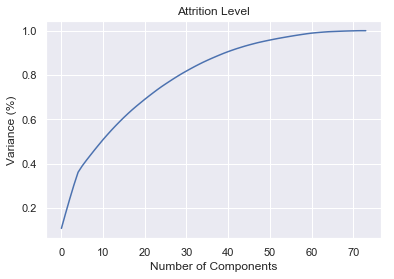

In [64]:
# Applying PCA function on training 
# and testing set of X component 

from sklearn.decomposition import PCA
X_train,X_test,y_train,y_test,cols,X,y= scaled_data(df)

pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Attrition Level')


###### Explained variance 

In [65]:
explained_variance = pca.explained_variance_ratio_ 
len(explained_variance)

74

###### Execute this step if you need the "PCA" Scaled "Train test split :X_train, X_test, y_train, y_test" 

In [66]:
# execute this step if you need the "PCA" Scaled "Train test split :X_train, X_test, y_train, y_test" 
pca = PCA(0.95)
X_unscale_pca = pca.fit_transform(X)
X_train,X_test,y_train,y_test,cols,X,y= scaled_data(df)
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = random_state)
# Defining Cols variables to store the Column names of X scaled dataframe.

#Logistic Regression...

# Using PCA scaled Data set for Logistic Regression...

classifier = LogisticRegression()
Attrition_prediction(classifier,X_train,X_test,y_train,y_test,cols)
print("************************************************************")
classifier = SVC(kernel='linear')
Attrition_prediction(classifier,X_train,X_test,y_train,y_test,cols)

There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Algorthims parameters used :

 LogisticRegression(C=1.0, class_weight=None, dual=F

### Imbalanced Data

##### Libraries needed for Imbalance Data

In [67]:
# Load the Imbalance Librarires for the further processing ...
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss,RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek
#from imblearn.ensemble import BalanceCascade

from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, auc,roc_auc_score,roc_curve, precision_recall_curve

##### Helper functions

The below functions used to itrate different Imbalance Techique (Transform Functions) to Techinques (Benchmark).

Benchmark:
- Performing Logistic Regression with penalty "L2".
- Doing Gridsearch on the above step.
- Fit the Dataset.

Transform:
- Transformer - Different Imbalance Techinques.
- Fit the Imbalanced libraries on the Dataset.

In [68]:
# Helper functions

def benchmark(sampling_type,X,y):
    #clf = LogisticRegression(penalty='l2')
    clf = model
    param_grid = {'C':[0.01,0.1,1,10]}
    """LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)"""
    grid_search_lr = GridSearchCV(estimator=clf,param_grid=param_grid,scoring='accuracy',cv=10,verbose=1,refit=True,n_jobs=-1)
    grid_search_lr = grid_search_lr.fit(X.values,y.values.ravel())
    
    return sampling_type,grid_search_lr.best_score_,grid_search_lr.best_params_['C']

def transform(transformer,X,y):
    print("Transforming {}".format(transformer.__class__.__name__))
    X_resampled,y_resampled =transformer.fit_sample(X.values,y.values.ravel())
    return transformer.__class__.__name__,pd.DataFrame(X_resampled),pd.DataFrame(y_resampled)
    
        

#####  Apply transform functions to Unscaled dataset


In [69]:

X_train,X_test,y_train,y_test,cols,X,y= unscaled_data(df)

datasets = []
datasets.append(("base",X_train,y_train))
datasets.append(transform(SMOTE(n_jobs=-1),X_train,y_train))
datasets.append(transform(RandomOverSampler(),X_train,y_train))
datasets.append(transform(NearMiss(n_jobs=-1),X_train,y_train))
datasets.append(transform(RandomUnderSampler(),X_train,y_train))
datasets.append(transform(SMOTEENN(),X_train,y_train))
datasets.append(transform(SMOTETomek(),X_train,y_train))


There are 10 columns to remove:
Threshold more than 0.7 
 ['TotalWorkingYears', 'BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobLevel_0', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Transforming SMOTE
Transforming RandomOverSampler
Transforming NearMiss
Transforming RandomUnderSampler
Transforming SMOTEENN
Transforming SMOTETomek


##### Determine best hyperparameters using: Benchmark

In [70]:
benchmark_scores =[]
for sample_type,X,y in datasets:
    print('__________________________________________________________________________')
    print('{}'.format(sample_type))
    benchmark_scores.append(benchmark(sample_type,X,y))
    print('__________________________________________________________________________')

__________________________________________________________________________
base
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.6s finished


__________________________________________________________________________
__________________________________________________________________________
SMOTE
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.8s finished
C:\Users\ArunVignesh\Anaconda3_2019\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


__________________________________________________________________________
__________________________________________________________________________
RandomOverSampler
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.3s finished


__________________________________________________________________________
__________________________________________________________________________
NearMiss
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.3s finished
C:\Users\ArunVignesh\Anaconda3_2019\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


__________________________________________________________________________
__________________________________________________________________________
RandomUnderSampler
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


__________________________________________________________________________
__________________________________________________________________________
SMOTEENN
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.6s finished
C:\Users\ArunVignesh\Anaconda3_2019\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


__________________________________________________________________________
__________________________________________________________________________
SMOTETomek
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.3s finished
C:\Users\ArunVignesh\Anaconda3_2019\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


__________________________________________________________________________


##### Check the output of Benchmarf Functions:

In [71]:
benchmark_scores

[('base', 0.859086491739553, 0.01),
 ('SMOTE', 0.9147331786542924, 0.01),
 ('RandomOverSampler', 0.9037122969837587, 0.01),
 ('NearMiss', 0.6856287425149701, 0.01),
 ('RandomUnderSampler', 0.7365269461077845, 0.01),
 ('SMOTEENN', 0.916058394160584, 0.01),
 ('SMOTETomek', 0.9114927344782034, 0.01)]

#### Train/evaluate models for each of tranformed datasets

The below function used to Test the data on models and find the Different Matrics scores for each Imbalance Techiques.

In [72]:
# Train/evaluate models for each of tranformed datasets

scores=[]
# Train model based on benchmark params ...

for sample_type,score,parm in benchmark_scores:
    print("Training on {}".format(sample_type))
    clf = LogisticRegression(penalty='l1',C=parm)
    for s_type,X,y in datasets:
        if s_type == sample_type:
            clf.fit(X.values,y.values.ravel())
            pred_test = clf.predict(X_test.values)
            pred_test_probs = clf.predict_proba(X_test.values)
            probs = clf.decision_function(X_test.values)
            fpr, tpr , thresholds = roc_curve(y_test.values.ravel(),pred_test)
            p,r,t = precision_recall_curve(y_test.values.ravel(),probs)
            scores.append((sample_type,
                          f1_score(y_test.values.ravel(),pred_test), 
                          precision_score(y_test.values.ravel(),pred_test),
                           recall_score(y_test.values.ravel(),pred_test),
                           accuracy_score(y_test.values.ravel(),pred_test),
                           auc(fpr,tpr),
                           auc(p,r,reorder=True),
                           confusion_matrix(y_test.values.ravel(),pred_test)))

Training on base
Training on SMOTE
Training on RandomOverSampler
Training on NearMiss
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


C:\Users\ArunVignesh\Anaconda3_2019\lib\site-packages\sklearn\metrics\ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ArunVignesh\Anaconda3_2019\lib\site-packages\sklearn\metrics\ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ArunVignesh\Anaconda3_2019\lib\site-packages\sklearn\metrics\ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ArunVignesh\Anaconda3_

#### Tabulate results

In [73]:
#Tabulate results
sampling_results_unscaled = pd.DataFrame(scores,columns=['Sampling Type','F1 Score','Precision','Recall','Accuracy','AUC_Score',
                                               'AUC_PR','Confusion Matrix'])
sampling_results_unscaled

,Sampling Type,F1 Score,Precision,Recall,Accuracy,AUC_Score,AUC_PR,Confusion Matrix
0,base,0.000000,0.000000,0.000000,0.841270,0.500000,0.147392,"[[371, 0], [70, 0]]"
1,SMOTE,0.356275,0.248588,0.628571,0.639456,0.635040,0.229616,"[[238, 133], [26, 44]]"
2,RandomOverSampler,0.347458,0.246988,0.585714,0.650794,0.624394,0.208101,"[[246, 125], [29, 41]]"
3,NearMiss,0.243542,0.164179,0.471429,0.535147,0.509299,0.113829,"[[203, 168], [37, 33]]"
4,RandomUnderSampler,0.253731,0.171717,0.485714,0.546485,0.521833,0.060472,"[[207, 164], [36, 34]]"
5,SMOTEENN,0.276074,0.175781,0.642857,0.464853,0.537062,0.052826,"[[160, 211], [25, 45]]"
6,SMOTETomek,0.284519,0.201183,0.485714,0.612245,0.560916,0.174732,"[[236, 135], [36, 34]]"


##### Apply transform functions to Scaled dataset

In [74]:

X_train,X_test,y_train,y_test,cols,X,y= scaled_data(df)

datasets = []
datasets.append(("base",X_train,y_train))
datasets.append(transform(SMOTE(n_jobs=-1),X_train,y_train))
datasets.append(transform(RandomOverSampler(),X_train,y_train))
datasets.append(transform(NearMiss(n_jobs=-1),X_train,y_train))
datasets.append(transform(RandomUnderSampler(),X_train,y_train))
datasets.append(transform(SMOTEENN(),X_train,y_train))
datasets.append(transform(SMOTETomek(),X_train,y_train))

There are 10 columns to remove:
Threshold more than 0.7 
 ['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']
['BusinessTravel_2', 'Department_2', 'JobInvolvement_2', 'JobRole_1', 'JobRole_7', 'PercentSalaryHike_4', 'StockOptionLevel_0', 'StockOptionLevel_1', 'MonthlyIncome', 'TotalWorkingYears']

Removing variables to avoid Dummy variable trap:

['BusinessTravel_0', 'Department_0', 'DistanceFromHome_2', 'Education_4', 'EducationField_0', 'EnvironmentSatisfaction_1', 'JobInvolvement_3', 'JobLevel_3', 'JobRole_4', 'JobSatisfaction_1', 'MaritalStatus_0', 'NumCompaniesWorked_1', 'PercentSalaryHike_3', 'RelationshipSatisfaction_1', 'StockOptionLevel_2', 'TrainingTimesLastYear_5', 'WorkLifeBalance_3', 'YearsInCurrentRole_3', 'YearsInCurrentRole_3', 'YearsWithCurrManager_4']


Transforming SMOTE
Transforming RandomOverSampler
Transforming NearMiss
Transformi

##### Determine best hyperparameters using: Benchmark

In [75]:
benchmark_scores =[]
for sample_type,X,y in datasets:
    print('__________________________________________________________________________')
    print('{}'.format(sample_type))
    benchmark_scores.append(benchmark(sample_type,X,y))
    print('__________________________________________________________________________')

__________________________________________________________________________
base
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.5s finished


__________________________________________________________________________
__________________________________________________________________________
SMOTE
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.3s finished
C:\Users\ArunVignesh\Anaconda3_2019\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


__________________________________________________________________________
__________________________________________________________________________
RandomOverSampler
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.2s finished


__________________________________________________________________________
__________________________________________________________________________
NearMiss
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.9s finished
C:\Users\ArunVignesh\Anaconda3_2019\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


__________________________________________________________________________
__________________________________________________________________________
RandomUnderSampler
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.6s finished
C:\Users\ArunVignesh\Anaconda3_2019\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


__________________________________________________________________________
__________________________________________________________________________
SMOTEENN
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.6s finished


__________________________________________________________________________
__________________________________________________________________________
SMOTETomek
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.3s finished
C:\Users\ArunVignesh\Anaconda3_2019\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


__________________________________________________________________________


##### Train/evaluate models for each of tranformed Scaled datasets

In [76]:
# Train/evaluate models for each of tranformed datasets

scores=[]
# Train model based on benchmark params ...

for sample_type,score,parm in benchmark_scores:
    print("Training on {}".format(sample_type))
    clf = LogisticRegression(penalty='l1',C=parm)
    for s_type,X,y in datasets:
        if s_type == sample_type:
            clf.fit(X.values,y.values.ravel())
            pred_test = clf.predict(X_test.values)
            pred_test_probs = clf.predict_proba(X_test.values)
            probs = clf.decision_function(X_test.values)
            fpr, tpr , thresholds = roc_curve(y_test.values.ravel(),pred_test)
            p,r,t = precision_recall_curve(y_test.values.ravel(),probs)
            scores.append((sample_type,
                          f1_score(y_test.values.ravel(),pred_test), 
                          precision_score(y_test.values.ravel(),pred_test),
                           recall_score(y_test.values.ravel(),pred_test),
                           accuracy_score(y_test.values.ravel(),pred_test),
                           auc(fpr,tpr),
                           auc(p,r,reorder=True),
                           confusion_matrix(y_test.values.ravel(),pred_test)))

Training on base
Training on SMOTE
Training on RandomOverSampler
Training on NearMiss
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


C:\Users\ArunVignesh\Anaconda3_2019\lib\site-packages\sklearn\metrics\ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ArunVignesh\Anaconda3_2019\lib\site-packages\sklearn\metrics\ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ArunVignesh\Anaconda3_2019\lib\site-packages\sklearn\metrics\ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ArunVignesh\Anaconda3_

##### Tabulate results

In [77]:
#Tabulate results
sampling_results_scaled = pd.DataFrame(scores,columns=['Sampling Type','F1 Score','Precision','Recall','Accuracy','AUC_Score',
                                               'AUC_PR','Confusion Matrix'])
sampling_results_scaled

,Sampling Type,F1 Score,Precision,Recall,Accuracy,AUC_Score,AUC_PR,Confusion Matrix
0,base,0.000000,0.000000,0.000000,0.841270,0.500000,0.420635,"[[371, 0], [70, 0]]"
1,SMOTE,0.326923,0.210744,0.728571,0.523810,0.606873,0.190554,"[[180, 191], [19, 51]]"
2,RandomOverSampler,0.310680,0.200837,0.685714,0.517007,0.585445,0.214772,"[[180, 191], [22, 48]]"
3,NearMiss,0.000000,0.000000,0.000000,0.841270,0.500000,0.420635,"[[371, 0], [70, 0]]"
4,RandomUnderSampler,0.000000,0.000000,0.000000,0.841270,0.500000,0.420635,"[[371, 0], [70, 0]]"
5,SMOTEENN,0.276680,0.160550,1.000000,0.170068,0.506739,0.211198,"[[5, 366], [0, 70]]"
6,SMOTETomek,0.304762,0.195918,0.685714,0.503401,0.577358,0.222642,"[[174, 197], [22, 48]]"


### Conclusion 

Algorthim which can be used for *Employee Attrition Modelling* can be:

- Logistic Regression:
    - Giving Test Accuracy of 89.756
    - PCA Accuarcy : 89.56
- SVC:
    - Giving Test Accuarcy of 89.34
- XGB:
    - Giving Test Accuarcy of 87.30
  